# Example 01

## User inputs

In [1]:
%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.tri as tri
plt.style.use('seaborn-poster')

import numpy as np
import datetime,subprocess
from scipy import constants
from lib.kernels import set_physics,set_survey

#set physicsical constants
E_C = constants.value(u'elementary charge') #1.602e-19 [C]
EPSILON_0 = constants.value(u'vacuum electric permittivity') #8.85e-12 [F/m]
N_A = constants.value(u'Avogadro constant') #6.022e23 [1/mol]
K_B = constants.value(u'Boltzmann constant') #1.381e-23 [J/K]
K_F = constants.value(u'Faraday constant') #96485.0 [C/mol]

#hard coded mesh indexing constants
ELEM_FLAG_SOLID = 1
ELEM_FLAG_WATER = 2
ELEM_FLAG_AIR = 3

EDGE_FLAG_SW_INTERFACE = 1
EDGE_FLAG_AW_INTERFACE = 2
EDGE_FLAG_EQUIPOTENTIAL_SURF = 3
EDGE_FLAG_AXIS_SYMMETRY = 4

EDGE_FLAG_TOP_BOUND = 11
EDGE_FLAG_BOTTOM_BOUND = 12
EDGE_FLAG_LEFT_BOUND = 13
EDGE_FLAG_RIGHT_BOUND = 14

#mesh name prefix
mesh_prefix = 'mesh_ex01'

#triangle executable path
#triangle = '/home/zhuy359/projects/E4D/third_party/triangle/triangle'
triangle = 'triangle'

#user input of slab model geometry
radius_air = 1.0 #radius of the air
height_air = 1.0 #height of the air
radius_water = 0.2 #radius of the water
height_water = 0.2 #height of the water
radius_solid = 1.0 #radius of the solid
height_solid = 1.0 #height of the solid

physics = set_physics(
    c_ion = [1.0,1.0], #ion concentration at infinity [mol/m^3]
    z_ion = [-1.0,1.0], #ion valence or charge number [SI]
    mu_a = [5e-8,5e-8], #ion mobility in electrolyte [m^2/(Vs)]
    mu_s = 5e-9, #ion mobility in solid [m^2/(Vs)]
    rel_perm_a = 80.0, #relative permittivity of electrolyte [SI]
    rel_perm_i = 4.5, #relative permittivity of solid [SI]
    sigma_solid = -0.01, #surface charge density for solid [C]
    temperature = 293.0, #ambient temperature [K]
    e_0 = [0.0,0.0], #Ex/Ey at infinity
    f_0 = [[0.0,0.0,1.0]], #coord_x/coord_y/charge density 
    s_0 = 10.0, #voltage on equipotential surface
    radius_a = 0.0, #radius of sphere particle
    is_metal = False, #True if the sphere particle is metal otherwise False
    )

survey = set_survey(
    ratio = [0.0], #ratio of sigma_stern to sigma_solid [SI]
    freq = [0.0], #frequency used for perturbation solution [Hz]
    )

lambda_d = physics['debye_length']
e_0 = physics['e_0']
f_0 = physics['f_0']
s_0 = physics['s_0']
now = datetime.datetime.now()
print('Done at',now.strftime("%Y-%m-%d %H:%M:%S"))


Done at 2022-05-09 17:40:04


## Radial Discretization

See radial discretization below
[0.00000000e+00 1.32159584e-06 2.00000000e-06 3.02664392e-06
 4.58028670e-06 6.93144843e-06 1.04895131e-05 1.58740105e-05
 2.40224887e-05 3.63537596e-05 5.50149427e-05 8.32553207e-05
 1.25992105e-04 1.90666619e-04 2.88539981e-04 4.36653889e-04
 6.60797919e-04 1.00000000e-03 1.51332196e-03 2.29014335e-03
 3.46572422e-03 5.24475656e-03 7.93700526e-03 1.20112443e-02
 1.81768798e-02 2.75074713e-02 4.16276604e-02 6.29960525e-02
 9.53333095e-02 1.44269991e-01 2.18326945e-01 5.00000000e-01]


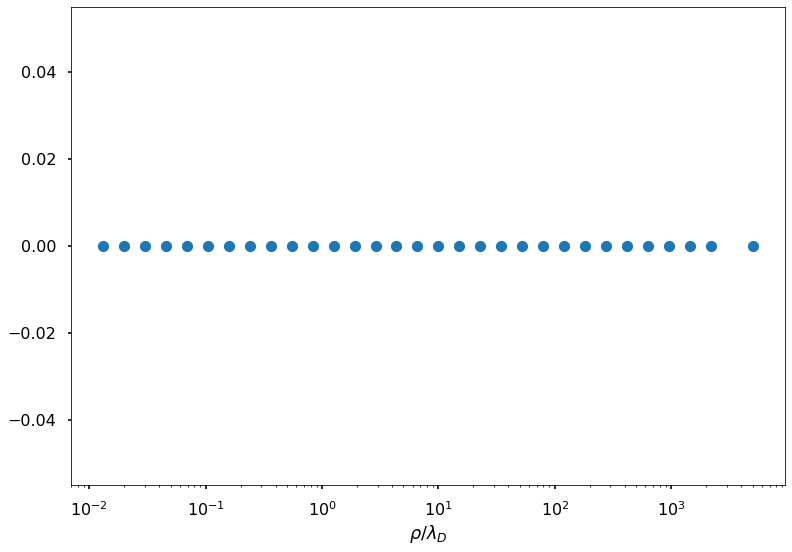

Done at 2022-05-09 17:40:05


In [2]:
def discretize_rho():
    #obtain fine grid near the point-source
    #use 16 points between 0.02*rho_0 and 10*rho_0
    
    rho_0 = 0.1e-3
    rho = np.logspace(np.log10(0.02),1,16)*rho_0
    dr = np.diff(np.log10(rho/rho_0))[0]
    
    #use the logarithmic interval above to discretize the entire space
    #which extends to radius_air/2 for this example
    rho = np.power(10,np.arange(np.log10(0.02)-dr,1,dr))*rho_0
    cnt = 0
    while rho[-1]<radius_air/2:
        cnt = cnt+1
        rho = np.power(10,np.arange(np.log10(0.02)-dr,1+dr*cnt,dr))*rho_0
    
    #adjust the starting and ending points in the discretization
    rho = np.r_[0,rho[:-2],radius_air/2]
        
    #print out discretization
    print('See radial discretization below')
    print(rho)
    
    #display and check the discretization
    fig,ax = plt.subplots()
    mask = rho>0
    ax.plot(rho[mask]/rho_0,np.zeros_like(rho[mask]),'o')
    ax.set_xscale('log')
    ax.set_xlabel(r'$\rho$/$\lambda_D$')
    #ax.set_xlim(0.01,20)
    plt.show()
    return rho

if __name__=='__main__':
    rho = discretize_rho()
    now = datetime.datetime.now()
    print('Done at',now.strftime("%Y-%m-%d %H:%M:%S"))


## Mesh generation

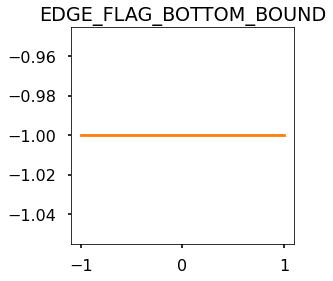

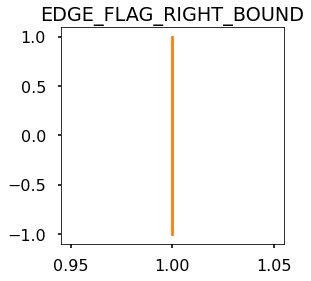

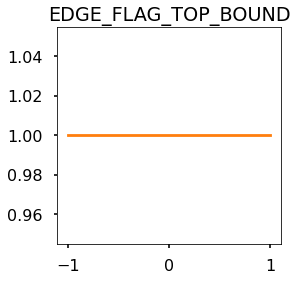

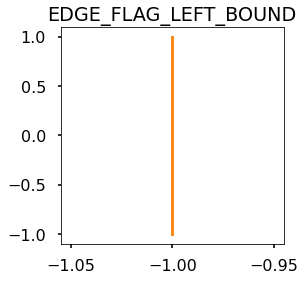

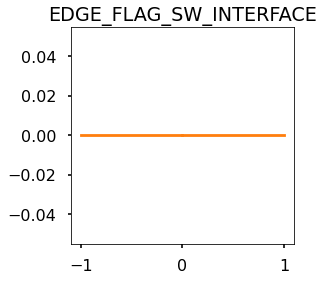

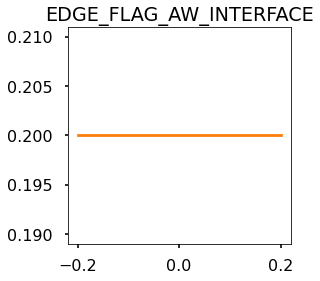

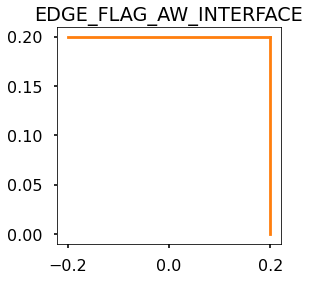

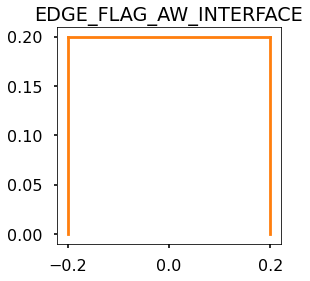

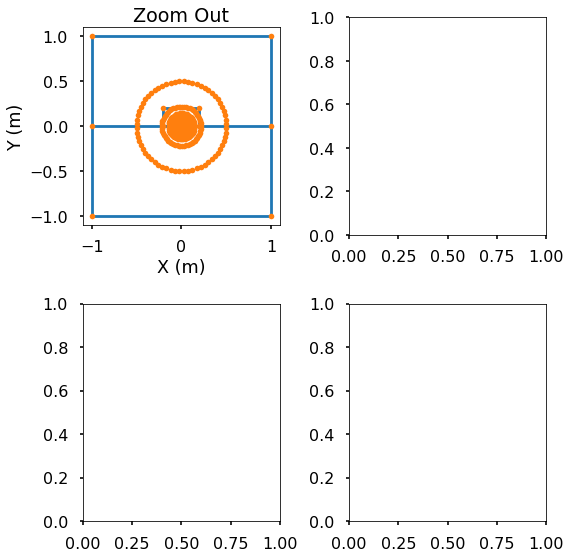

Opening mesh_ex01.poly.
Constructing Delaunay triangulation by divide-and-conquer method.
Delaunay milliseconds:  3
Recovering segments in Delaunay triangulation.
Segment milliseconds:  0
Removing unwanted triangles.
Spreading regional attributes and area constraints.
Hole milliseconds:  0
Adding Steiner points to enforce quality.
Quality milliseconds:  7

Writing mesh_ex01.1.node.
Writing mesh_ex01.1.ele.
Writing mesh_ex01.1.poly.
Writing mesh_ex01.1.edge.
Writing mesh_ex01.1.neigh.

Output milliseconds:  32
Total running milliseconds:  44

Statistics:

  Input vertices: 1995
  Input segments: 9
  Input holes: 0

  Mesh vertices: 7171
  Mesh triangles: 14213
  Mesh edges: 21383
  Mesh exterior boundary edges: 127
  Mesh interior boundary edges: 336
  Mesh subsegments (constrained edges): 463

Done at 2022-05-09 17:40:06


In [3]:
def generate_mesh():
    dist_factor = 1.0e6
    disp_factor = 1.0
    
    #This script assumes the same height and radius for air and solid
    #This script also assumes the water extends to the air radius
    #X is the axis of symmetry
    #Y is the longitudinal axis
    cpts = np.zeros((0,3)) #coord_x/coord_y/flag of control points
    segs = np.zeros((0,3)) #ind_a/ind_b/flag of line segmenets
    holes = np.zeros((0,2)) #coord_x/coord_y
    zones = np.zeros((0,3)) #coord_x/coord_y/area
    
    #**************************************************************************
    #--------------------------------------------------------------------------
    #==========================================================================
    #define the lowermost, rightmost, and topmost boundary points
    radius_b = np.max(np.r_[radius_air,radius_solid])
    height_b = np.max(np.r_[height_air,height_solid])
    x = np.r_[-radius_b,radius_b,radius_b,-radius_b]
    y = np.r_[-height_b,-height_b,height_b,height_b]
    cpts = np.r_[cpts,np.c_[x,y,np.ones(len(x))*1]] #node flag of 1
    
    #define the point source location
    for i in range(len(f_0)):
        x = np.r_[f_0[i][0]]
        y = np.r_[f_0[i][1]]
        cpts = np.r_[cpts,np.c_[x,y,np.ones(len(x))*0]] #node flag of 0

    #define the refinement near the point source
    nA = 32
    dA = np.pi/nA
    phi = np.arange(0,nA*2)*dA+dA/2 #shift from x-axis
    for i in range(len(f_0)):
        for j in range(1,len(rho)):
            x = rho[j]*np.cos(phi)+f_0[i][0]
            y = rho[j]*np.sin(phi)+f_0[i][1]
            cpts = np.r_[cpts,np.c_[x,y,np.ones(len(x))*0]] #node flag of 0
    
    #define the solid-water interface
    x = np.r_[-radius_b,radius_b]
    y = np.r_[0,0]
    cpts = np.r_[cpts,np.c_[x,y,np.ones(len(x))*1]] #node flag of 1
    
    #define the air-water interface
    if height_water<height_b:
        x = np.r_[-radius_water,radius_water]
        y = np.r_[height_water,height_water]
        cpts = np.r_[cpts,np.c_[x,y,np.ones(len(x))*0]] #node flag of 0
    
    if radius_water<radius_b:
        x = np.r_[-radius_water,radius_water]
        y = np.r_[0,0]
        cpts = np.r_[cpts,np.c_[x,y,np.ones(len(x))*0]] #node flag of 0
    
    #**************************************************************************
    #--------------------------------------------------------------------------
    #==========================================================================
    #define the segments on the lowermost boundary
    x = np.r_[-radius_b,radius_b]
    y = np.r_[-height_b,-height_b]
    for i in range(len(x)-1):
        ind_a = np.argmin((cpts[:,0]-x[i])**2+(cpts[:,1]-y[i])**2)
        ind_b = np.argmin((cpts[:,0]-x[i+1])**2+(cpts[:,1]-y[i+1])**2)
        diff_a = (cpts[ind_a,0]-x[i])**2+(cpts[ind_a,1]-y[i])**2
        diff_b = (cpts[ind_b,0]-x[i+1])**2+(cpts[ind_b,1]-y[i+1])**2
        if (diff_a+diff_b)>0:
            print('WARNING: EDGE FLAG #',EDGE_FLAG_BOTTOM_BOUND,diff_a,diff_b)
        segs = np.r_[segs,np.c_[ind_a,ind_b,EDGE_FLAG_BOTTOM_BOUND]] #predefined edge flag
    
    fig,ax = plt.subplots(figsize=(4,4))
    mask = segs[:,-1].astype(int) == EDGE_FLAG_BOTTOM_BOUND
    x = cpts[segs[:,:-1].astype(int),0]
    y = cpts[segs[:,:-1].astype(int),1]
    ax.plot(x[mask,:].T,y[mask,:].T,color='tab:orange')
    ax.set_title('EDGE_FLAG_BOTTOM_BOUND')
    plt.show()
    
    #--------------------------------------------------------------------------
    #define the segments on the rightmost boundary
    x = np.r_[radius_b,radius_b]
    y = np.r_[-height_b,height_b]
    for i in range(len(x)-1):
        ind_a = np.argmin((cpts[:,0]-x[i])**2+(cpts[:,1]-y[i])**2)
        ind_b = np.argmin((cpts[:,0]-x[i+1])**2+(cpts[:,1]-y[i+1])**2)
        diff_a = (cpts[ind_a,0]-x[i])**2+(cpts[ind_a,1]-y[i])**2
        diff_b = (cpts[ind_b,0]-x[i+1])**2+(cpts[ind_b,1]-y[i+1])**2
        if (diff_a+diff_b)>0:
            print('WARNING: EDGE FLAG #',EDGE_FLAG_RIGHT_BOUND,diff_a,diff_b)
        segs = np.r_[segs,np.c_[ind_a,ind_b,EDGE_FLAG_RIGHT_BOUND]] #predefined edge flag
    
    fig,ax = plt.subplots(figsize=(4,4))
    mask = segs[:,-1].astype(int) == EDGE_FLAG_RIGHT_BOUND
    x = cpts[segs[:,:-1].astype(int),0]
    y = cpts[segs[:,:-1].astype(int),1]
    ax.plot(x[mask,:].T,y[mask,:].T,color='tab:orange')
    ax.set_title('EDGE_FLAG_RIGHT_BOUND')
    plt.show()
    
    #--------------------------------------------------------------------------
    #define the segments on the topmost boundary
    x = np.r_[-radius_b,radius_b]
    y = np.r_[height_b,height_b]
    for i in range(len(x)-1):
        ind_a = np.argmin((cpts[:,0]-x[i])**2+(cpts[:,1]-y[i])**2)
        ind_b = np.argmin((cpts[:,0]-x[i+1])**2+(cpts[:,1]-y[i+1])**2)
        diff_a = (cpts[ind_a,0]-x[i])**2+(cpts[ind_a,1]-y[i])**2
        diff_b = (cpts[ind_b,0]-x[i+1])**2+(cpts[ind_b,1]-y[i+1])**2
        if (diff_a+diff_b)>0:
            print('WARNING: EDGE FLAG #',EDGE_FLAG_TOP_BOUND,diff_a,diff_b)
        segs = np.r_[segs,np.c_[ind_a,ind_b,EDGE_FLAG_TOP_BOUND]] #predefined edge flag
    
    fig,ax = plt.subplots(figsize=(4,4))
    mask = segs[:,-1].astype(int) == EDGE_FLAG_TOP_BOUND
    x = cpts[segs[:,:-1].astype(int),0]
    y = cpts[segs[:,:-1].astype(int),1]
    ax.plot(x[mask,:].T,y[mask,:].T,color='tab:orange')
    ax.set_title('EDGE_FLAG_TOP_BOUND')
    plt.show()
    
    #--------------------------------------------------------------------------
    #define the segments on the leftmost boundary
    x = np.r_[-radius_b,-radius_b]
    y = np.r_[-height_b,height_b]
    for i in range(len(x)-1):
        ind_a = np.argmin((cpts[:,0]-x[i])**2+(cpts[:,1]-y[i])**2)
        ind_b = np.argmin((cpts[:,0]-x[i+1])**2+(cpts[:,1]-y[i+1])**2)
        diff_a = (cpts[ind_a,0]-x[i])**2+(cpts[ind_a,1]-y[i])**2
        diff_b = (cpts[ind_b,0]-x[i+1])**2+(cpts[ind_b,1]-y[i+1])**2
        if (diff_a+diff_b)>0:
            print('WARNING: EDGE FLAG #',EDGE_FLAG_LEFT_BOUND,diff_a,diff_b)
        segs = np.r_[segs,np.c_[ind_a,ind_b,EDGE_FLAG_LEFT_BOUND]] #predefined edge flag
    
    fig,ax = plt.subplots(figsize=(4,4))
    mask = segs[:,-1].astype(int) == EDGE_FLAG_LEFT_BOUND
    x = cpts[segs[:,:-1].astype(int),0]
    y = cpts[segs[:,:-1].astype(int),1]
    ax.plot(x[mask,:].T,y[mask,:].T,color='tab:orange')
    ax.set_title('EDGE_FLAG_LEFT_BOUND')
    plt.show()
    
    #--------------------------------------------------------------------------
    #define the segments on the top edge of the solid (solid-water interface)
    x = np.r_[-radius_b,radius_b]
    y = np.r_[0,0]
    for i in range(len(f_0)):
        if f_0[i][1] == 0:
            mask = x<f_0[i][0]
            x = np.r_[x[mask],f_0[i][0],x[~mask]]
            y = np.zeros_like(x)
    for i in range(len(x)-1):
        ind_a = np.argmin((cpts[:,0]-x[i])**2+(cpts[:,1]-y[i])**2)
        ind_b = np.argmin((cpts[:,0]-x[i+1])**2+(cpts[:,1]-y[i+1])**2)
        diff_a = (cpts[ind_a,0]-x[i])**2+(cpts[ind_a,1]-y[i])**2
        diff_b = (cpts[ind_b,0]-x[i+1])**2+(cpts[ind_b,1]-y[i+1])**2
        if (diff_a+diff_b)>0:
            print('WARNING: EDGE FLAG #',EDGE_FLAG_SW_INTERFACE,diff_a,diff_b)
        segs = np.r_[segs,np.c_[ind_a,ind_b,EDGE_FLAG_SW_INTERFACE]] #predefined edge flag
    
    fig,ax = plt.subplots(figsize=(4,4))
    mask = segs[:,-1].astype(int) == EDGE_FLAG_SW_INTERFACE
    x = cpts[segs[:,:-1].astype(int),0]
    y = cpts[segs[:,:-1].astype(int),1]
    ax.plot(x[mask,:].T,y[mask,:].T,color='tab:orange')
    ax.set_title('EDGE_FLAG_SW_INTERFACE')
    plt.show()
    
    #--------------------------------------------------------------------------
    #define the segments on the top edge of the water (air-water interface)
    if height_water<height_b:
        x = np.r_[-radius_water,radius_water]
        y = np.r_[height_water,height_water]
        for i in range(len(x)-1):
            ind_a = np.argmin((cpts[:,0]-x[i])**2+(cpts[:,1]-y[i])**2)
            ind_b = np.argmin((cpts[:,0]-x[i+1])**2+(cpts[:,1]-y[i+1])**2)
            diff_a = (cpts[ind_a,0]-x[i])**2+(cpts[ind_a,1]-y[i])**2
            diff_b = (cpts[ind_b,0]-x[i+1])**2+(cpts[ind_b,1]-y[i+1])**2
            if (diff_a+diff_b)>0:
                print('WARNING: EDGE FLAG #',EDGE_FLAG_AW_INTERFACE,diff_a,diff_b)
            segs = np.r_[segs,np.c_[ind_a,ind_b,EDGE_FLAG_AW_INTERFACE]] #predefined edge flag

        fig,ax = plt.subplots(figsize=(4,4))
        mask = segs[:,-1].astype(int) == EDGE_FLAG_AW_INTERFACE
        x = cpts[segs[:,:-1].astype(int),0]
        y = cpts[segs[:,:-1].astype(int),1]
        ax.plot(x[mask,:].T,y[mask,:].T,color='tab:orange')
        ax.set_title('EDGE_FLAG_AW_INTERFACE')
        plt.show()
    
    #--------------------------------------------------------------------------
    #define the segments on the right edge of the water (air-water interface)
    if radius_water<radius_b:
        x = np.r_[radius_water,radius_water]
        y = np.r_[0,height_water]
        for i in range(len(x)-1):
            ind_a = np.argmin((cpts[:,0]-x[i])**2+(cpts[:,1]-y[i])**2)
            ind_b = np.argmin((cpts[:,0]-x[i+1])**2+(cpts[:,1]-y[i+1])**2)
            diff_a = (cpts[ind_a,0]-x[i])**2+(cpts[ind_a,1]-y[i])**2
            diff_b = (cpts[ind_b,0]-x[i+1])**2+(cpts[ind_b,1]-y[i+1])**2
            if (diff_a+diff_b)>0:
                print('WARNING: EDGE FLAG #',EDGE_FLAG_AW_INTERFACE,diff_a,diff_b)
            segs = np.r_[segs,np.c_[ind_a,ind_b,EDGE_FLAG_AW_INTERFACE]] #predefined edge flag

        fig,ax = plt.subplots(figsize=(4,4))
        mask = segs[:,-1].astype(int) == EDGE_FLAG_AW_INTERFACE
        x = cpts[segs[:,:-1].astype(int),0]
        y = cpts[segs[:,:-1].astype(int),1]
        ax.plot(x[mask,:].T,y[mask,:].T,color='tab:orange')
        ax.set_title('EDGE_FLAG_AW_INTERFACE')
        plt.show()
        
    #--------------------------------------------------------------------------
    #define the segments on the left edge of the water (air-water interface)
    if radius_water<radius_b:
        x = np.r_[-radius_water,-radius_water]
        y = np.r_[0,height_water]
        for i in range(len(x)-1):
            ind_a = np.argmin((cpts[:,0]-x[i])**2+(cpts[:,1]-y[i])**2)
            ind_b = np.argmin((cpts[:,0]-x[i+1])**2+(cpts[:,1]-y[i+1])**2)
            diff_a = (cpts[ind_a,0]-x[i])**2+(cpts[ind_a,1]-y[i])**2
            diff_b = (cpts[ind_b,0]-x[i+1])**2+(cpts[ind_b,1]-y[i+1])**2
            if (diff_a+diff_b)>0:
                print('WARNING: EDGE FLAG #',EDGE_FLAG_AW_INTERFACE,diff_a,diff_b)
            segs = np.r_[segs,np.c_[ind_a,ind_b,EDGE_FLAG_AW_INTERFACE]] #predefined edge flag

        fig,ax = plt.subplots(figsize=(4,4))
        mask = segs[:,-1].astype(int) == EDGE_FLAG_AW_INTERFACE
        x = cpts[segs[:,:-1].astype(int),0]
        y = cpts[segs[:,:-1].astype(int),1]
        ax.plot(x[mask,:].T,y[mask,:].T,color='tab:orange')
        ax.set_title('EDGE_FLAG_AW_INTERFACE')
        plt.show()
    
    #**************************************************************************
    #--------------------------------------------------------------------------
    #==========================================================================
    #define markers for holes and zones
    if height_water<height_b:
        x = np.r_[0,0,0] #solid,water
        y = np.r_[-height_solid/2,height_water/2,height_water+(height_b-height_water)/2]
        area = np.r_[1.0,1.0,1.0]*(radius_b*dist_factor/20)**2
        zones = np.r_[zones,np.c_[x,y,area]]
    else:
        x = np.r_[0,0] #solid,water
        y = np.r_[-height_solid/2,height_water/2]
        area = np.r_[1.0,1.0]*(radius_b*dist_factor/20)**2
        zones = np.r_[zones,np.c_[x,y,area]]
    
    #build the poly file
    f1 = open(mesh_prefix+'.poly','w')
    f1.write(str(len(cpts))+'  2 0 1  #verticies #dimensions  #attributes #boundary markers \n')
    
    #write the vertices
    cnt = 1    
    for i in range(len(cpts)):
        x = cpts[i,0]*dist_factor
        y = cpts[i,1]*dist_factor
        flag = cpts[i,2]
        f1.write("{0:6.0F} {1:20.5E} {2:20.5E} {3:6.0F}\n".format(cnt,x,y,flag))
        cnt = cnt+1
    f1.write('\n')

    #write the segments
    cnt = 1
    f1.write(str(len(segs))+' 1 #segments, boundary marker\n')
    for i in range(len(segs)):
        ind_a = segs[i,0]+1
        ind_b = segs[i,1]+1
        flag = segs[i,2]
        f1.write("{0:6.0F} {1:5.0F} {2:5.0F} {3:6.0F}\n".format(cnt,ind_a,ind_b,flag))
        cnt = cnt+1
    f1.write('\n')
    
    #write holes
    f1.write('%d\n'%(len(holes)))
    for i in range(len(holes)):
        x = holes[i,0]*dist_factor
        y = holes[i,1]*dist_factor
        f1.write('{0:6.0F} {1:12.6E} {2:12.6E} 1\n'.format(i+1,x,y))
    f1.write('\n')

    #write area constraints for zones
    f1.write('%d\n'%(len(zones)))
    for i in range(len(zones)):
        x = zones[i,0]*dist_factor
        y = zones[i,1]*dist_factor
        area = zones[i,2]
        f1.write('{0:6.0F} {1:12.6E} {2:12.6E} {3:6.0F} {4:12.6E}\n'.format(i+1,x,y,i+1,area))
    
    f1.write('\n')
    f1.write('# triangle -pnq30Aae '+mesh_prefix+'.poly \n')
    f1.close()
    
    #**************************************************************************
    #==========================================================================
    #--------------------------------------------------------------------------
    fig,ax = plt.subplots(2,2,figsize=(8,8))
    axs = ax.flatten()
    x = cpts[segs[:,:-1].astype(int),0]
    y = cpts[segs[:,:-1].astype(int),1]
    axs[0].plot(x.T*disp_factor,y.T*disp_factor,'-',color='tab:blue')
    axs[0].plot(cpts[:,0]*disp_factor,cpts[:,1]*disp_factor,'.',color='tab:orange')
    axs[0].set_xlabel('X (m)')
    axs[0].set_ylabel('Y (m)')
    axs[0].set_aspect('equal')
    axs[0].set_title('Zoom Out')
        
    plt.tight_layout()
    plt.show()
    return cpts,segs

if __name__ == '__main__':
    cpts,segs = generate_mesh()
    process = subprocess.Popen([triangle+' -pnq30Aae '+mesh_prefix+'.poly'],shell=True)
    process.wait()
    now = datetime.datetime.now()
    print('Done at',now.strftime("%Y-%m-%d %H:%M:%S"))


# Example 03

## User inputs

In [5]:
%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.tri as tri
plt.style.use('seaborn-poster')

import numpy as np
import datetime,subprocess
from scipy import constants
from lib.kernels import set_physics,set_survey

#set physicsical constants
E_C = constants.value(u'elementary charge') #1.602e-19 [C]
EPSILON_0 = constants.value(u'vacuum electric permittivity') #8.85e-12 [F/m]
N_A = constants.value(u'Avogadro constant') #6.022e23 [1/mol]
K_B = constants.value(u'Boltzmann constant') #1.381e-23 [J/K]
K_F = constants.value(u'Faraday constant') #96485.0 [C/mol]

#hard coded mesh indexing constants
ELEM_FLAG_SOLID = 1
ELEM_FLAG_WATER = 2
ELEM_FLAG_AIR = 3

EDGE_FLAG_SW_INTERFACE = 1
EDGE_FLAG_AW_INTERFACE = 2
EDGE_FLAG_EQUIPOTENTIAL_SURF = 3
EDGE_FLAG_AXIS_SYMMETRY = 4

EDGE_FLAG_TOP_BOUND = 11
EDGE_FLAG_BOTTOM_BOUND = 12
EDGE_FLAG_LEFT_BOUND = 13
EDGE_FLAG_RIGHT_BOUND = 14

#mesh name prefix
mesh_prefix = 'mesh_ex03'

#triangle executable path
#triangle = '/home/zhuy359/projects/E4D/third_party/triangle/triangle'
triangle = 'triangle'

#mesh properties
radius_a = 0.1e-6 #radius of the sphere particle
radius_b = 4*radius_a #radius of the bounding box

physics = set_physics(
    c_ion = [1.0,1.0], #ion concentration at infinity [mol/m^3]
    z_ion = [-1.0,1.0], #ion valence or charge number [SI]
    mu_a = [5e-8,5e-8], #ion mobility in electrolyte [m^2/(Vs)]
    mu_s = 5e-9, #ion mobility in solid [m^2/(Vs)]
    rel_perm_a = 80.0, #relative permittivity of electrolyte [SI]
    rel_perm_i = 4.5, #relative permittivity of solid [SI]
    sigma_solid = 0.01, #surface charge density for solid [C]
    temperature = 293.0, #ambient temperature [K]
    e_0 = [1.0,0.0], #Ex/Ey at infinity
    f_0 = [[0.0,30e-9,0.0]], #coord_x/coord_y/charge density 
    s_0 = 0.0, #voltage on equipotential surface
    radius_a = radius_a, #radius of sphere particle
    is_metal = True, #True if the sphere particle is metal otherwise False
    )

lambda_d = physics['debye_length']
now = datetime.datetime.now()
print('Done at',now.strftime("%Y-%m-%d %H:%M:%S"))


Done at 2022-05-09 18:47:43


## Radial discretization

DEBYE LENGTH IS: 9.63e+00 nm
See radial discretization below
[0.00000000e+00 1.00000000e-07 1.00127231e-07 1.00192541e-07
 1.00291377e-07 1.00440947e-07 1.00667295e-07 1.01009832e-07
 1.01528202e-07 1.02312661e-07 1.03499801e-07 1.05296325e-07
 1.08015045e-07 1.12129344e-07 1.18355602e-07 1.27777936e-07
 1.42036960e-07 1.63615454e-07 1.96270664e-07 2.45688510e-07
 3.20473621e-07 4.00000000e-07]
Done


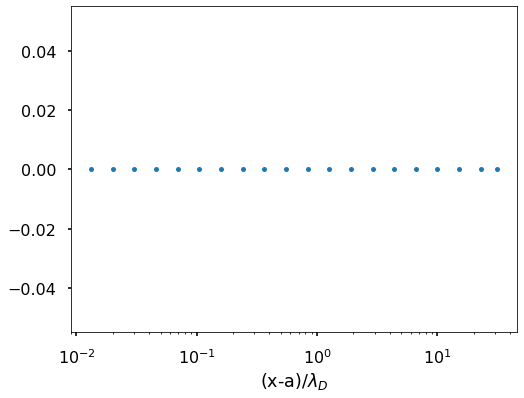

In [6]:
def discretize_rho():
    print('DEBYE LENGTH IS: %.2e nm'%(min(lambda_d)*1e9))

    rho = np.logspace(np.log10(0.02),1,16)*min(lambda_d)+radius_a
    dr = np.diff(np.log10((rho-radius_a)/min(lambda_d)))[0]
    rho = np.power(10,np.arange(np.log10(0.02)-dr,1,dr))*min(lambda_d)+radius_a
    cnt = 0
    while rho[-1]<radius_b:
        cnt = cnt+1
        rho = np.power(10,np.arange(np.log10(0.02)-dr,1+dr*cnt,dr))*min(lambda_d)+radius_a
    rho = np.r_[0,radius_a,rho[:-1],radius_b]
    print('See radial discretization below')
    print(rho)
    #print(np.pi*radius_a/400,rho[2]-radius_a)
    
    fig,ax = plt.subplots(figsize=(8,6))
    mask = rho>radius_a
    ax.plot((rho[mask]-radius_a)/min(lambda_d),np.zeros_like(rho[mask]),'o',markersize=5)
    ax.set_xscale('log')
    #ax.set_xlim(0.01,radius_b/min(lambda_d))
    ax.set_xlabel('(x-a)/$\lambda_D$')
    
    return rho.astype(float)

if __name__ == '__main__':
    rho = discretize_rho()
    print('Done')
    plt.show()

## Mesh generation

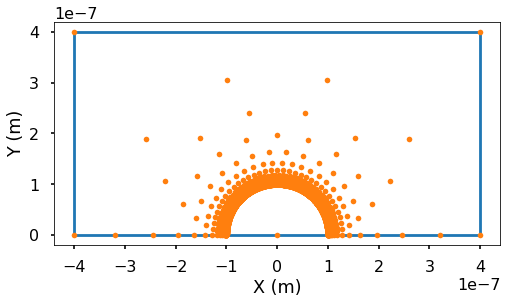

Opening mesh_ex03.poly.
Constructing Delaunay triangulation by divide-and-conquer method.
Delaunay milliseconds:  6
Recovering segments in Delaunay triangulation.
Segment milliseconds:  0
Removing unwanted triangles.
Spreading regional attributes and area constraints.
Hole milliseconds:  0
Adding Steiner points to enforce quality.
Quality milliseconds:  15

Writing mesh_ex03.1.node.
Writing mesh_ex03.1.ele.
Writing mesh_ex03.1.poly.
Writing mesh_ex03.1.edge.
Writing mesh_ex03.1.neigh.

Output milliseconds:  69
Total running milliseconds:  95

Statistics:

  Input vertices: 4004
  Input segments: 445
  Input holes: 0

  Mesh vertices: 9432
  Mesh triangles: 18727
  Mesh edges: 28158
  Mesh exterior boundary edges: 135
  Mesh interior boundary edges: 836
  Mesh subsegments (constrained edges): 971

Done


In [7]:
def generate_mesh():
    #X is the longitudinal axis
    #Y is the axis of symmetry
    cpts = np.zeros((0,3)) #coord_x/coord_y/flag of control points
    segs = np.zeros((0,3)) #ind_a/ind_b/flag of line segmenets
    holes = np.zeros((0,2)) #coord_x/coord_y
    zones = np.zeros((0,3)) #coord_x/coord_y/area
    
    x = np.r_[0.0,0.0]
    y = np.r_[0.5*radius_a,2.0*radius_a]
    area = np.r_[1e12,(radius_b/20)**2]
    zones = np.r_[zones,np.c_[x,y,area]]
    
    #**************************************************************************
    #--------------------------------------------------------------------------
    #==========================================================================
    #define the two corner points on the topmost boundary
    x = np.r_[radius_b,-radius_b]
    y = np.r_[radius_b,radius_b]
    cpts = np.r_[cpts,np.c_[x,y,np.ones(len(x))*1]] #node flag of 1
    
    #define the points on the axis of symmetry (Y = 0)
    x = np.r_[np.flipud(-rho),rho[1:]]
    y = np.zeros(len(rho)*2-1)
    cpts = np.r_[cpts,np.c_[x,y,np.ones(len(x))*1]] #node flag of 1
    
    #define the inner sphere points centered at (0,0) with radius a
    dA = max(np.pi*radius_a/400,rho[2]-radius_a)/radius_a
    nA = np.ceil(np.pi/dA)
    ns = nA+1-2
    
    dA = np.pi/nA
    phi = np.arange(1,ns+1)*dA #half the circle
    x = radius_a*np.cos(phi)+0.0
    y = radius_a*np.sin(phi)+0.0
    cpts = np.r_[cpts,np.c_[x,y,np.ones(len(x))*0]] #node flag of 0
    
    #define the inner refined points
    for i in range(3,len(rho)-1):
        dA = max(np.pi*radius_a/400,rho[i]-rho[i-1])/radius_a
        nA = np.ceil(np.pi/dA)
        ns = nA+1-2
        
        dA = np.pi/nA
        phi = np.arange(1,ns+1)*dA
        x = rho[i]*np.cos(phi)+0.0
        y = rho[i]*np.sin(phi)+0.0
        cpts = np.r_[cpts,np.c_[x,y,np.ones(len(x))*0]] #node flag of 0

    #**************************************************************************
    #--------------------------------------------------------------------------
    #==========================================================================
    #define the segments on the topmost boundary (Y = 10*a)
    x = np.r_[radius_b,-radius_b]
    y = np.r_[radius_b,radius_b]
    for i in range(len(x)-1):
        ind_a = np.argmin((cpts[:,0]-x[i])**2+(cpts[:,1]-y[i])**2)
        ind_b = np.argmin((cpts[:,0]-x[i+1])**2+(cpts[:,1]-y[i+1])**2)
        segs = np.r_[segs,np.c_[ind_a,ind_b,EDGE_FLAG_TOP_BOUND]] #predefined edge flag

    #define the segments on the axis of symmetry (Y = 0)
    x = np.r_[np.flipud(-rho),rho[1:]]
    y = np.zeros(len(rho)*2-1)
    for i in range(len(x)-1):
        ind_a = np.argmin((cpts[:,0]-x[i])**2+(cpts[:,1]-y[i])**2)
        ind_b = np.argmin((cpts[:,0]-x[i+1])**2+(cpts[:,1]-y[i+1])**2)
        segs = np.r_[segs,np.c_[ind_a,ind_b,EDGE_FLAG_AXIS_SYMMETRY]] #predefined edge flag
        
    #define the segments on the leftmost boundary (X = -10*a)
    x = np.r_[-radius_b,-radius_b]
    y = np.r_[0,radius_b]
    for i in range(len(x)-1):
        ind_a = np.argmin((cpts[:,0]-x[i])**2+(cpts[:,1]-y[i])**2)
        ind_b = np.argmin((cpts[:,0]-x[i+1])**2+(cpts[:,1]-y[i+1])**2)
        segs = np.r_[segs,np.c_[ind_a,ind_b,EDGE_FLAG_LEFT_BOUND]] #edge flag of 6

    #define the segmesnts on the rightmost boundary (X = 10*a)
    x = np.r_[radius_b,radius_b]
    y = np.r_[0,radius_b]
    for i in range(len(x)-1):
        ind_a = np.argmin((cpts[:,0]-x[i])**2+(cpts[:,1]-y[i])**2)
        ind_b = np.argmin((cpts[:,0]-x[i+1])**2+(cpts[:,1]-y[i+1])**2)
        segs = np.r_[segs,np.c_[ind_a,ind_b,EDGE_FLAG_RIGHT_BOUND]] #predefined edge flag
    
    #define the segments along the inner sphere centered at (0,0) with radius a
    dA = max(np.pi*radius_a/400,rho[2]-radius_a)/radius_a
    nA = np.ceil(np.pi/dA)
    ns = nA+1-2
    
    dA = np.pi/nA
    phi = np.arange(0,ns+2)*dA #half the circle
    x = radius_a*np.cos(phi)+0.0
    y = radius_a*np.sin(phi)+0.0
    for i in range(len(x)-1):
        ind_a = np.argmin((cpts[:,0]-x[i])**2+(cpts[:,1]-y[i])**2)
        ind_b = np.argmin((cpts[:,0]-x[i+1])**2+(cpts[:,1]-y[i+1])**2)
        segs = np.r_[segs,np.c_[ind_a,ind_b,EDGE_FLAG_SW_INTERFACE]] #predefined edge flag
    
    
    #**************************************************************************
    #--------------------------------------------------------------------------
    #==========================================================================
    #build the poly file
    f1 = open(mesh_prefix+'.poly','w')
    f1.write(str(len(cpts))+'  2 0 1  #verticies #dimensions  #attributes #boundary markers\n')
    
    #write the vertices
    cnt = 1
    for i in range(len(cpts)):
        f1.write("{0:6.0F} {1:20.5F} {2:20.5F} {3:6.0F}\n".format(cnt,cpts[i,0]*1e6,cpts[i,1]*1e6,cpts[i,2]))
        cnt = cnt+1
    f1.write('\n')
    
    #write the segments
    cnt = 1
    f1.write(str(len(segs))+' 1 #segments, boundary marker\n')
    for i in range(len(segs)):
        f1.write("{0:6.0F} {1:5.0F} {2:5.0F} {3:6.0F}\n".format(cnt,segs[i,0]+1,segs[i,1]+1,segs[i,2]))
        cnt = cnt+1
    f1.write('\n')
    
    #write holes
    #f1.write('\n\n0\n\n')
    f1.write('%d\n'%(len(holes)))
    for i in range(len(holes)):
        x = holes[i,0]*1e6
        y = holes[i,1]*1e6
        f1.write('{0:6.0F} {1:12.6F} {2:12.6F} 1\n'.format(i+1,x,y))
    f1.write('\n')
    
    #write area constraints for zones
    #f1.write('2\n')
    #f1.write('1 {0:12.6F} {1:12.6F} 1 {2:12.6F}\n'.format(0.0,0.5e6*a,1e12))
    #f1.write('2 {0:12.6F} {1:12.6F} 2 {2:12.6F}\n'.format(0.0,2e6*a,(10e6*a/20)**2))
    f1.write('%d\n'%(len(zones)))
    for i in range(len(zones)):
        x = zones[i,0]*1e6
        y = zones[i,1]*1e6
        area = zones[i,2]*1e12
        f1.write('{0:6.0F} {1:12.6F} {2:12.6F} {3:6.0F} {4:12.6F}\n'.format(i+1,x,y,i+1,area))

    f1.write('\n')
    f1.write('# triangle -pnq30Aae '+mesh_prefix+'.poly \n')
    f1.close()
    
    #**************************************************************************
    #--------------------------------------------------------------------------
    #==========================================================================
    #display control points and line segments
    fig,ax = plt.subplots(figsize=(8,6))
    x = cpts[segs[:,:-1].astype(int),0]
    y = cpts[segs[:,:-1].astype(int),1]
    ax.plot(x.T,y.T,'-',color='tab:blue')
    ax.plot(cpts[:,0],cpts[:,1],'.',color='tab:orange')
    ax.set_xlabel('X (m)')
    ax.set_ylabel('Y (m)')
    ax.set_aspect('equal')
    plt.show()
    return cpts.astype(float),segs.astype(int)

if __name__ == '__main__':
    cpts,segs = generate_mesh()
    process = subprocess.Popen([triangle+' -pnq30Aae '+mesh_prefix+'.poly'],shell=True)
    process.wait()
    print('Done')
    

# Cantilever Model (ex_05)

## User inputs

In [15]:
%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.tri as tri
plt.style.use('seaborn-poster')

import numpy as np
import datetime,subprocess
from scipy import constants
from lib.kernels import set_physics,set_survey

#set physicsical constants
E_C = constants.value(u'elementary charge') #1.602e-19 [C]
EPSILON_0 = constants.value(u'vacuum electric permittivity') #8.85e-12 [F/m]
N_A = constants.value(u'Avogadro constant') #6.022e23 [1/mol]
K_B = constants.value(u'Boltzmann constant') #1.381e-23 [J/K]
K_F = constants.value(u'Faraday constant') #96485.0 [C/mol]

#hard coded mesh indexing constants
ELEM_FLAG_SOLID = 1
ELEM_FLAG_WATER = 2
ELEM_FLAG_AIR = 3

EDGE_FLAG_SW_INTERFACE = 1
EDGE_FLAG_AW_INTERFACE = 2
EDGE_FLAG_EQUIPOTENTIAL_SURF = 3
EDGE_FLAG_AXIS_SYMMETRY = 4

EDGE_FLAG_TOP_BOUND = 11
EDGE_FLAG_BOTTOM_BOUND = 12
EDGE_FLAG_LEFT_BOUND = 13
EDGE_FLAG_RIGHT_BOUND = 14

#mesh name prefix
mesh_prefix = 'mesh_ex05'

#triangle executable path
#triangle = '/home/zhuy359/projects/E4D/third_party/triangle/triangle'
triangle = 'triangle'

#user input of slab model geometry
radius_air = 500e-6 #radius of the air
height_air = 500e-6 #height of the air
radius_water = 20e-6 #radius of thin water film
height_water = 10e-9 #thickness of thin water film
radius_solid = radius_air #radius of the solid
height_solid = height_air #height of the solid
radius_tip = 10e-9 #radius of cantilever tip
offset_tip = 20e-9 #offset between cantilever tip and sw interface
radius_cone = 20e-6 #radius of cantilever cone
height_cone = 20e-6 #height of cantilever cone
radius_arm = 40e-6 #radius of cantilever arm
height_arm = 5e-6 #height of cantilever arm

physics = set_physics(
    c_ion = [1.0,1.0], #ion concentration at infinity [mol/m^3]
    z_ion = [-1.0,1.0], #ion valence or charge number [SI]
    mu_a = [5e-8,5e-8], #ion mobility in electrolyte [m^2/(Vs)]
    mu_s = 5e-9, #ion mobility in solid [m^2/(Vs)]
    rel_perm_a = 80.0, #relative permittivity of electrolyte [SI]
    rel_perm_i = 4.5, #relative permittivity of solid [SI]
    sigma_solid = -0.01, #surface charge density for solid [C]
    temperature = 293.0, #ambient temperature [K]
    e_0 = [0.0,0.0], #Ex/Ey at infinity
    f_0 = [[0.0,30e-9,0.0]], #coord_x/coord_y/charge density 
    s_0 = 10.0, #voltage on equipotential surface
    radius_a = None, #radius of sphere particle
    is_metal = False, #True if the sphere particle is metal otherwise False
    )

lambda_d = physics['debye_length']
now = datetime.datetime.now()
print('Done at',now.strftime("%Y-%m-%d %H:%M:%S"))


Done at 2022-05-10 04:27:07


## Radial discretization

DEBYE LENGTH IS: 9.00e+00 nm
min(np.diff(rho) 9.24e-02 nm
height_water 1.00e-08 nm

See radial discretization below
[0.e+00 1.e-08 2.e-05]


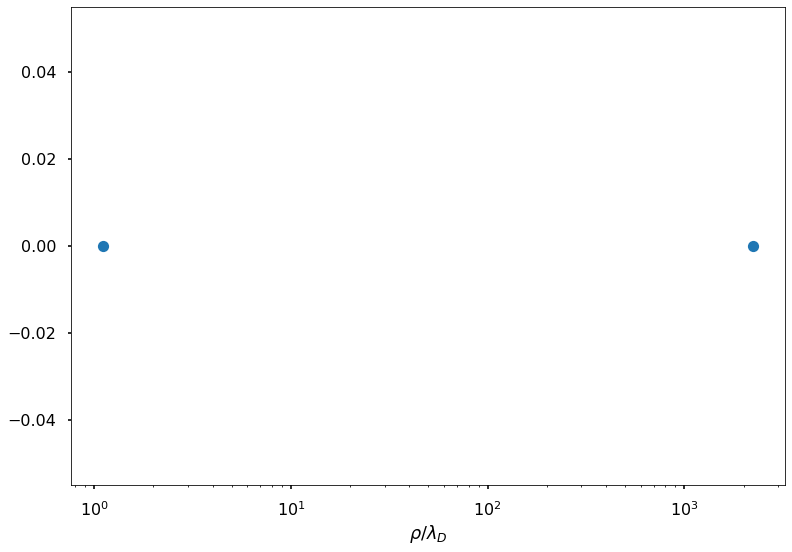

Done at 2022-05-10 04:27:10


In [16]:
def discretize_rho():
    #obtain fine grid next to the solid-liquid interface
    #use 16 points between 0.02*debye_len and 10*debye_len
    #reduce debye_length if water film is too thin by
    debye_length = min(9e-9,height_water)
    print('DEBYE LENGTH IS: %.2e nm'%(debye_length*1e9))
    
    rho = np.logspace(np.log10(0.02),1,16)*debye_length
    dr = np.diff(np.log10(rho/debye_length))[0]
    print('min(np.diff(rho) %.2e nm'%(min(np.diff(rho))*1e9))
    print('height_water %.2e nm'%height_water)
    print('')
    
    #use the logarithmic interval above to discretize the entire space
    #which extends to radius_solid for this slab example
    rho = np.power(10,np.arange(np.log10(0.02)-dr,1,dr))*debye_length
    cnt = 0
    while rho[-1]<radius_solid:
        cnt = cnt+1
        rho = np.power(10,np.arange(np.log10(0.02)-dr,1+dr*cnt,dr))*debye_length
    
    #adjust the starting and ending points in the discretization
    rho = np.r_[0,rho[:-2],radius_water]
    #no need to refine diffuse layer because there is no diffuse layer
    rho = np.r_[0,radius_water]
    
    #insert air-water interface into the discretization
    mask = rho<height_water
    rho = np.r_[rho[mask],height_water,rho[~mask]]
    #ind = np.argmin((rho-height_water)**2)
    #rho[ind] = height_water
    
    #print out discretization
    print('See radial discretization below')
    print(rho)
    
    #display and check the discretization
    fig,ax = plt.subplots()
    mask = rho>0
    ax.plot(rho[mask]/debye_length,np.zeros_like(rho[mask]),'o')
    ax.set_xscale('log')
    ax.set_xlabel(r'$\rho$/$\lambda_D$')
    #ax.set_xlim(0.01,20)
    plt.show()
    return rho

if __name__=='__main__':
    rho = discretize_rho()
    now = datetime.datetime.now()
    print('Done at',now.strftime("%Y-%m-%d %H:%M:%S"))


## Mesh generation

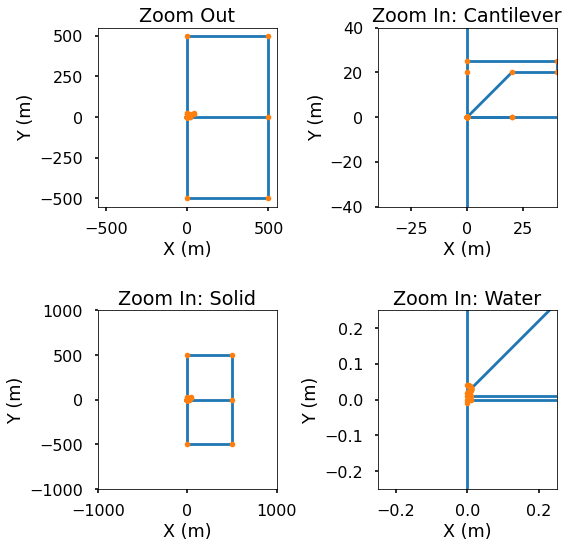

Opening mesh_ex05.poly.
Constructing Delaunay triangulation by divide-and-conquer method.
Delaunay milliseconds:  0
Recovering segments in Delaunay triangulation.
Segment milliseconds:  0
Removing unwanted triangles.
Spreading regional attributes and area constraints.
Hole milliseconds:  0
Adding Steiner points to enforce quality.
Quality milliseconds:  31

Writing mesh_ex05.1.node.
Writing mesh_ex05.1.ele.
Writing mesh_ex05.1.poly.
Writing mesh_ex05.1.edge.
Writing mesh_ex05.1.neigh.

Output milliseconds:  92
Total running milliseconds:  124

Statistics:

  Input vertices: 50
  Input segments: 36
  Input holes: 1

  Mesh vertices: 11604
  Mesh triangles: 23049
  Mesh edges: 34652
  Mesh exterior boundary edges: 157
  Mesh interior boundary edges: 3276
  Mesh subsegments (constrained edges): 3433

Done at 2022-05-10 04:27:14


In [17]:
def generate_mesh():
    #This script only works for the same height and radius between air and solid
    #X is the axis of symmetry
    #Y is the longitudinal axis
    cpts = np.zeros((0,3)) #coord_x/coord_y/flag of control points
    segs = np.zeros((0,3)) #ind_a/ind_b/flag of line segmenets
    holes = np.zeros((0,2)) #coord_x/coord_y
    zones = np.zeros((0,3)) #coord_x/coord_y/area
        
    #**************************************************************************
    #--------------------------------------------------------------------------
    #==========================================================================
    #define the lowermost, rightmost, and topmost boundary points
    radius_b = max(radius_air,radius_solid)
    height_b = max(height_air,height_solid)
    x = np.r_[0,radius_b,radius_b,0]
    y = np.r_[-height_b,-height_b,height_b,height_b]
    cpts = np.r_[cpts,np.c_[x,y,np.ones(len(x))*1]] #node flag of 1
        
    #define the leftmost boundary points (on the axis of symmetry)
    #skip points at two ends
    mask = (rho>0)&(rho<offset_tip)
    y = np.r_[-np.flipud(rho[:-1]),rho[mask],offset_tip,
              offset_tip+2*radius_tip,
              offset_tip+2*radius_tip+height_cone,
              offset_tip+2*radius_tip+height_cone+height_arm]
    x = np.zeros_like(y)
    cpts = np.r_[cpts,np.c_[x,y,np.ones(len(x))*1]] #node flag of 1
    
    #--------------------------------------------------------------------------
    #define the top edge points of the solid (top right corner point included)
    #skip edge points on the axis of symmetry
    x = np.r_[rho[1:-1],radius_solid]
    y = np.r_[0*rho[1:-1],0]
    cpts = np.r_[cpts,np.c_[x,y,np.ones(len(x))*0]] #node flag of 0
    
    #--------------------------------------------------------------------------
    #define the top edge points of the water
    #skip edge points on the axis of symmetry
    x = np.r_[rho[1:-1],radius_water]
    y = np.ones_like(x)*height_water
    cpts = np.r_[cpts,np.c_[x,y,np.ones(len(x))*0]] #node flag of 0
    
    #define the bottom edge points of the water
    #skip the bottom edge points on the axis of symmetry
    x = np.r_[radius_water]
    y = np.r_[0]
    cpts = np.r_[cpts,np.c_[x,y,np.ones(len(x))*0]] #node flag of 0
    
    #--------------------------------------------------------------------------
    #define the edge points on the tip surface
    #skip edge points on the axis of symmetry
    nA = 32
    ns = nA+1-2
    dA = np.pi/nA
    phi = np.arange(1,ns+1)*dA-np.pi/2 #half the circle
    x = radius_tip*np.cos(phi)+0.0
    y = radius_tip*np.sin(phi)+offset_tip+radius_tip
    cpts = np.r_[cpts,np.c_[x,y,np.ones(len(x))*0]] #node flag of 0
    
    #--------------------------------------------------------------------------
    #define the edge points on the cone surface
    x = np.r_[radius_cone]
    y = np.r_[height_cone]+offset_tip+2*radius_tip
    cpts = np.r_[cpts,np.c_[x,y,np.ones(len(x))*0]] #node flag of 0
    
    #--------------------------------------------------------------------------
    #define inner control points along the cantilever
    x = np.r_[radius_arm,radius_arm]
    y = np.r_[0,height_arm]+offset_tip+2*radius_tip+height_cone
    cpts = np.r_[cpts,np.c_[x,y,np.ones(len(x))*0]] #node flag of 0
    
    #**************************************************************************
    #--------------------------------------------------------------------------
    #==========================================================================
    #define the segments on the lowermost boundary
    x = np.r_[0,radius_b]
    y = np.r_[-radius_b,-radius_b]
    for i in range(len(x)-1):
        ind_a = np.argmin((cpts[:,0]-x[i])**2+(cpts[:,1]-y[i])**2)
        ind_b = np.argmin((cpts[:,0]-x[i+1])**2+(cpts[:,1]-y[i+1])**2)
        segs = np.r_[segs,np.c_[ind_a,ind_b,EDGE_FLAG_BOTTOM_BOUND]] #predefined edge flag
    #print('Lowermost boundary: edge flag 1')
    
    #define the segments on the rightmost boundary
    x = np.r_[radius_b,radius_b]
    y = np.r_[-radius_b,radius_b]
    for i in range(len(x)-1):
        ind_a = np.argmin((cpts[:,0]-x[i])**2+(cpts[:,1]-y[i])**2)
        ind_b = np.argmin((cpts[:,0]-x[i+1])**2+(cpts[:,1]-y[i+1])**2)
        segs = np.r_[segs,np.c_[ind_a,ind_b,EDGE_FLAG_RIGHT_BOUND]] #predefined edge flag
    #print('Rightmost boundary: edge flag 2')
    
    #define the segments on the topmost boundary
    x = np.r_[0,radius_b]
    y = np.r_[radius_b,radius_b]
    for i in range(len(x)-1):
        ind_a = np.argmin((cpts[:,0]-x[i])**2+(cpts[:,1]-y[i])**2)
        ind_b = np.argmin((cpts[:,0]-x[i+1])**2+(cpts[:,1]-y[i+1])**2)
        segs = np.r_[segs,np.c_[ind_a,ind_b,EDGE_FLAG_TOP_BOUND]] #predefined edge flag
    #print('Uppermost boundary: edge flag 3')
    
    #define the segments on the leftmost boundary (axis of symmetry)
    mask = (rho>0)&(rho<offset_tip)
    y = np.r_[-radius_b,-np.flipud(rho),rho[mask],offset_tip,
              offset_tip+2*radius_tip,offset_tip+2*radius_tip+height_cone,
              offset_tip+2*radius_tip+height_cone+height_arm,radius_b]
    x = np.zeros_like(y)
    for i in range(len(x)-1):
        ind_a = np.argmin((cpts[:,0]-x[i])**2+(cpts[:,1]-y[i])**2)
        ind_b = np.argmin((cpts[:,0]-x[i+1])**2+(cpts[:,1]-y[i+1])**2)
        segs = np.r_[segs,np.c_[ind_a,ind_b,EDGE_FLAG_AXIS_SYMMETRY]] #predefined edge flag
    #print('Axis of symmetry: edge flag 4')
    
    #--------------------------------------------------------------------------
    #define the segments on the top edge of the solid (solid-liquid interface)
    x = np.r_[rho[:-1],radius_solid]
    y = np.zeros_like(x)
    for i in range(len(x)-1):
        ind_a = np.argmin((cpts[:,0]-x[i])**2+(cpts[:,1]-y[i])**2)
        ind_b = np.argmin((cpts[:,0]-x[i+1])**2+(cpts[:,1]-y[i+1])**2)
        segs = np.r_[segs,np.c_[ind_a,ind_b,EDGE_FLAG_SW_INTERFACE]] #predefined edge flag
    #print('Solid-liquid interface: edge flag 7')
    
    #--------------------------------------------------------------------------
    #define the segments on the right edge of the water
    x = np.r_[radius_water,radius_water]
    y = np.r_[0,height_water]
    for i in range(len(x)-1):
        ind_a = np.argmin((cpts[:,0]-x[i])**2+(cpts[:,1]-y[i])**2)
        ind_b = np.argmin((cpts[:,0]-x[i+1])**2+(cpts[:,1]-y[i+1])**2)
        segs = np.r_[segs,np.c_[ind_a,ind_b,EDGE_FLAG_AW_INTERFACE]] #predefined edge flag
    #print('Right of water: edge flag 8')
    
    #define the segments on the top edge of the water
    x = np.r_[0,radius_water]
    y = np.r_[height_water,height_water]
    for i in range(len(x)-1):
        ind_a = np.argmin((cpts[:,0]-x[i])**2+(cpts[:,1]-y[i])**2)
        ind_b = np.argmin((cpts[:,0]-x[i+1])**2+(cpts[:,1]-y[i+1])**2)
        segs = np.r_[segs,np.c_[ind_a,ind_b,EDGE_FLAG_AW_INTERFACE]] #predefined edge flag
    #print('Air-water interface: edge flag 9')
    
    #--------------------------------------------------------------------------
    #define the segments along the bottom tip surface
    nA = 32
    ns = nA+1-2
    dA = np.pi/nA
    phi = np.arange(0,nA//2+1)*dA-np.pi/2 #half the circle
    #print(phi*180/np.pi)
    x = radius_tip*np.cos(phi)+0.0
    y = radius_tip*np.sin(phi)+offset_tip+radius_tip
    for i in range(len(x)-1):
        ind_a = np.argmin((cpts[:,0]-x[i])**2+(cpts[:,1]-y[i])**2)
        ind_b = np.argmin((cpts[:,0]-x[i+1])**2+(cpts[:,1]-y[i+1])**2)
        segs = np.r_[segs,np.c_[ind_a,ind_b,EDGE_FLAG_EQUIPOTENTIAL_SURF]] #predefined edge flag
    #print('Lower tip surface: edge flag 10')

#     #define the segments along the top tip surface
#     nA = 32
#     ns = nA+1-2
#     dA = np.pi/nA
#     phi = np.arange(nA//2,nA+1)*dA-np.pi/2 #half the circle
#     #print(phi*180/np.pi)
#     x = radius_tip*np.cos(phi)+0.0
#     y = radius_tip*np.sin(phi)+offset_tip+radius_tip
#     for i in range(len(x)-1):
#         ind_a = np.argmin((cpts[:,0]-x[i])**2+(cpts[:,1]-y[i])**2)
#         ind_b = np.argmin((cpts[:,0]-x[i+1])**2+(cpts[:,1]-y[i+1])**2)
#         segs = np.r_[segs,np.c_[ind_a,ind_b,EDGE_FLAG_EQUIPOTENTIAL_SURF]] #predefined edge flag
#     #print('Upper tip surface: edge flag 11')
    
    #--------------------------------------------------------------------------
    #define the right segments along the cone surface
    x = np.r_[radius_tip,radius_cone]
    y = np.r_[0,height_cone+radius_tip]+offset_tip+radius_tip
    for i in range(len(x)-1):
        ind_a = np.argmin((cpts[:,0]-x[i])**2+(cpts[:,1]-y[i])**2)
        ind_b = np.argmin((cpts[:,0]-x[i+1])**2+(cpts[:,1]-y[i+1])**2)
        segs = np.r_[segs,np.c_[ind_a,ind_b,EDGE_FLAG_EQUIPOTENTIAL_SURF]] #predefined edge flag
    #print('Right cone surface: edge flag 100')
    
#     #define the top segments along the cone surface
#     x = np.r_[0,radius_cone]
#     y = np.r_[height_cone,height_cone]+offset_tip+2*radius_tip
#     for i in range(len(x)-1):
#         ind_a = np.argmin((cpts[:,0]-x[i])**2+(cpts[:,1]-y[i])**2)
#         ind_b = np.argmin((cpts[:,0]-x[i+1])**2+(cpts[:,1]-y[i+1])**2)
#         segs = np.r_[segs,np.c_[ind_a,ind_b,100]] #edge flag of 100
#     #print('Top cone surface: edge flag 100')
    
    #--------------------------------------------------------------------------
    #define the segments along the remaining cantilever surface
    x = np.r_[0,radius_arm,radius_arm,radius_cone]
    y = np.r_[height_arm,height_arm,0,0]+offset_tip+2*radius_tip+height_cone
    for i in range(len(x)-1):
        ind_a = np.argmin((cpts[:,0]-x[i])**2+(cpts[:,1]-y[i])**2)
        ind_b = np.argmin((cpts[:,0]-x[i+1])**2+(cpts[:,1]-y[i+1])**2)
        segs = np.r_[segs,np.c_[ind_a,ind_b,EDGE_FLAG_EQUIPOTENTIAL_SURF]] #predefined edge flag
    #print('Arm surface: edge flag 100')
    print('')
    
    #**************************************************************************
    #--------------------------------------------------------------------------
    #==========================================================================
    #define markers for holes and zones
#     x = np.r_[0,0,0,0,0,0]+radius_tip/2 #solid,water,tip,cone,arm,air
#     y = np.r_[-height_solid/2,height_water/2,offset_tip+radius_tip,
#               offset_tip+2*radius_tip+height_cone/2,
#               offset_tip+2*radius_tip+height_cone+height_arm/2,
#               height_air/4]
#     area = np.r_[1,1,1,100,100,900]
#     zones = np.r_[zones,np.c_[x,y,area]]
    x = np.r_[0]+radius_tip/2 #cantilever tip
    y = np.r_[offset_tip+radius_tip]
    holes = np.r_[holes,np.c_[x,y]]

    x = np.r_[0,0,0]+radius_tip/2 #solid,water,air
    y = np.r_[-height_solid/2,height_water/2,height_air/2]
    area = np.r_[900,1,900]
    zones = np.r_[zones,np.c_[x,y,area]]

    
    #build the poly file
    f1 = open(mesh_prefix+'.poly','w')
    f1.write(str(len(cpts))+'  2 0 1  #verticies #dimensions  #attributes #boundary markers \n')
    
    #write the vertices
    cnt = 1    
    for i in range(len(cpts)):
        f1.write("{0:6.0F} {1:20.5F} {2:20.5F} {3:6.0F}\n".format(cnt,cpts[i,0]*1e6,cpts[i,1]*1e6,cpts[i,2]))
        cnt = cnt+1
    f1.write('\n')

    #write the segments
    cnt = 1
    f1.write(str(len(segs))+' 1 #segments, boundary marker\n')
    for i in range(len(segs)):
        f1.write("{0:6.0F} {1:5.0F} {2:5.0F} {3:6.0F}\n".format(cnt,segs[i,0]+1,segs[i,1]+1,segs[i,2]))
        cnt = cnt+1
    f1.write('\n')
        
    #write holes
    f1.write('%d\n'%(len(holes)))
    for i in range(len(holes)):
        x = holes[i,0]
        y = holes[i,1]
        f1.write('{0:6.0F} {1:12.6F} {2:12.6F} 1\n'.format(i+1,x*1e6,y*1e6))
    f1.write('\n')

    #write area constraints for zones
    f1.write('%d\n'%(len(zones)))
    for i in range(len(zones)):
        x = zones[i,0]
        y = zones[i,1]
        area = zones[i,2]
        f1.write('{0:6.0F} {1:12.6F} {2:12.6F} {3:6.0F} {4:12.6F}\n'.format(i+1,x*1e6,y*1e6,i+1,area))
    
    f1.write('\n')
    f1.write('# triangle -pnq30Aae '+mesh_prefix+'.poly \n')
    f1.close()
        
    #**************************************************************************
    #==========================================================================
    #--------------------------------------------------------------------------
    disp_factor = 1e6
    fig,ax = plt.subplots(2,2,figsize=(8,8))
    axs = ax.flatten()
    x = cpts[segs[:,:-1].astype(int),0]
    y = cpts[segs[:,:-1].astype(int),1]
    axs[0].plot(x.T*disp_factor,y.T*disp_factor,'-',color='tab:blue')
    axs[0].plot(cpts[:,0]*disp_factor,cpts[:,1]*disp_factor,'.',color='tab:orange')
    axs[0].set_xlabel('X (m)')
    axs[0].set_ylabel('Y (m)')
    axs[0].set_aspect('equal')
    axs[0].set_xlim(-radius_air*1.1*disp_factor,radius_air*1.1*disp_factor)
    axs[0].set_ylim(-radius_air*1.1*disp_factor,radius_air*1.1*disp_factor)
    axs[0].set_title('Zoom Out')
    
    axs[1].plot(x.T*disp_factor,y.T*disp_factor,'-',color='tab:blue')
    axs[1].plot(cpts[:,0]*disp_factor,cpts[:,1]*disp_factor,'.',color='tab:orange')
    axs[1].set_xlabel('X (m)')
    axs[1].set_ylabel('Y (m)')
    axs[1].set_aspect('equal')
    axs[1].set_xlim(-height_cone*2*disp_factor,height_cone*2*disp_factor)
    axs[1].set_ylim(-height_cone*2*disp_factor,height_cone*2*disp_factor)
    axs[1].set_title('Zoom In: Cantilever')
    
    axs[2].plot(x.T*disp_factor,y.T*disp_factor,'-',color='tab:blue')
    axs[2].plot(cpts[:,0]*disp_factor,cpts[:,1]*disp_factor,'.',color='tab:orange')
    axs[2].set_xlabel('X (m)')
    axs[2].set_ylabel('Y (m)')
    axs[2].set_aspect('equal')
    axs[2].set_xlim(-height_solid*2*disp_factor,height_solid*2*disp_factor)
    axs[2].set_ylim(-height_solid*2*disp_factor,height_solid*2*disp_factor)
    axs[2].set_title('Zoom In: Solid')
    
    axs[3].plot(x.T*disp_factor,y.T*disp_factor,'-',color='tab:blue')
    axs[3].plot(cpts[:,0]*disp_factor,cpts[:,1]*disp_factor,'.',color='tab:orange')
    axs[3].set_xlabel('X (m)')
    axs[3].set_ylabel('Y (m)')
    axs[3].set_aspect('equal')
    axs[3].set_xlim(-height_water*25*disp_factor,height_water*25*disp_factor)
    axs[3].set_ylim(-height_water*25*disp_factor,height_water*25*disp_factor)
    axs[3].set_title('Zoom In: Water')
    
    plt.tight_layout()
    plt.show()
    return cpts,segs

if __name__ == '__main__':
    cpts,segs = generate_mesh()
    process = subprocess.Popen([triangle+' -pnq30Aae '+mesh_prefix+'.poly'],shell=True)
    process.wait()
    now = datetime.datetime.now()
    print('Done at',now.strftime("%Y-%m-%d %H:%M:%S"))


## Mesh visualization

Reading mesh_ex05.1.node
Reading mesh_ex05.1.ele
Reading mesh_ex05.1.edge
THE NUMBER OF NODES IS: 11621
THE NUMBER OF ELEMENTS IS: 23049
THE NUMBER OF EDGES IS: 34652
node_flags [ 0  1  2  3  4 11 12 14]
elem_flags [1 2 3]
edge_flags [ 0  1  2  3  4 11 12 14]

[[   57    81   123]
 [   71    55    63]
 [   53    22    21]
 ...
 [11403 11619 11264]
 [11451 11595 11620]
 [11596 11620 11595]]


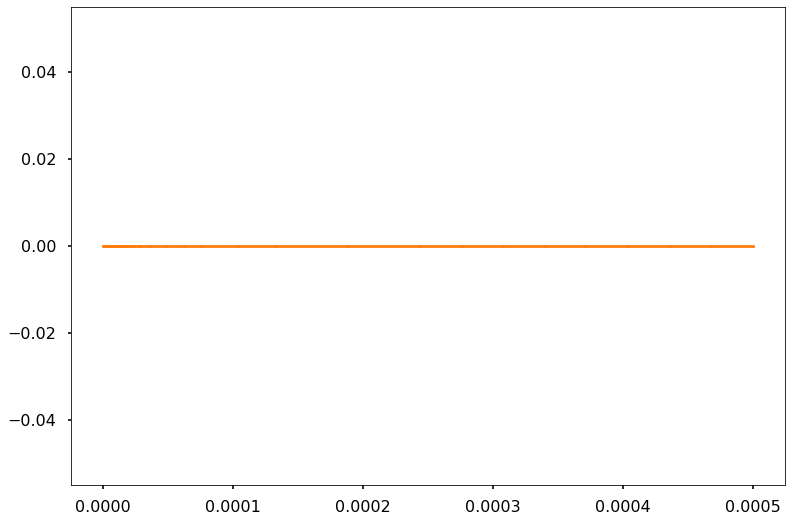

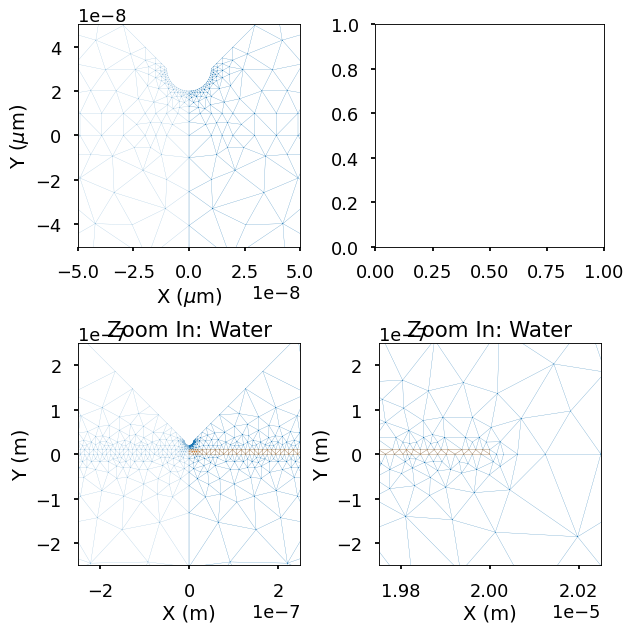

Done at 2022-05-10 04:27:28


In [18]:
def display_mesh():    
    #modify user inputs below
    mesh_prefix='mesh_ex05'
    
    #load mesh
    print('Reading %s.1.node'%mesh_prefix)
    nodes=np.genfromtxt(mesh_prefix+'.1.node',skip_header=1,skip_footer=0,usecols=(1,2))
    node_flags=np.genfromtxt(mesh_prefix+'.1.node',skip_header=1,skip_footer=0,usecols=3,dtype='int')

    print('Reading %s.1.ele'%mesh_prefix)
    elements=np.genfromtxt(mesh_prefix+'.1.ele',skip_header=1,usecols=(1,2,3),dtype='int')
    elem_flags=np.genfromtxt(mesh_prefix+'.1.ele',skip_header=1,usecols=4,dtype='int')

    print('Reading %s.1.edge'%mesh_prefix)
    edges=np.genfromtxt(mesh_prefix+'.1.edge',skip_header=1,usecols=(1,2),dtype='int')
    edge_flags=np.genfromtxt(mesh_prefix+'.1.edge',skip_header=1,usecols=3,dtype='int')

    #adjust indices to start from zero
    elements=elements-1
    edges=edges-1
    
    #scale nodes from meter to micro-meter
    nodes=nodes*1e-6
    
    nnode=len(nodes)
    nelem=len(elements)
    nedge=len(edges)
    print('THE NUMBER OF NODES IS: %d'%nnode)
    print('THE NUMBER OF ELEMENTS IS: %d'%nelem)
    print('THE NUMBER OF EDGES IS: %d'%nedge)
    print('node_flags',np.unique(node_flags))
    print('elem_flags',np.unique(elem_flags))
    print('edge_flags',np.unique(edge_flags))
    print('')
    
    #**************************************************************************
    #==========================================================================
    #--------------------------------------------------------------------------
    #display mesh
    disp_factor = 1e6
    x=nodes[:,0]*disp_factor
    y=nodes[:,1]*disp_factor

    fig,ax = plt.subplots()
    mask = edge_flags == EDGE_FLAG_SW_INTERFACE
#     x = nodes[edges[mask,:],0]
#     y = nodes[edges[mask,:],1]
#     ax.plot(x.T,y.T,'-',color='tab:orange')
    x=nodes[edges,0]
    y=nodes[edges,1]
    ax.plot(x[mask,:].T,y[mask,:].T,'-',color='tab:orange')

    disp_factor = 1
    x=nodes[:,0]*disp_factor
    y=nodes[:,1]*disp_factor
    
    fig,ax=plt.subplots(2,2,figsize=(8,8),dpi=80)
    axs=ax.flatten()
    
    mask = elem_flags>=1
    print(elements[mask,:])
    axs[0].triplot(x,y,elements[mask,:],linewidth=0.2,color='tab:blue')
    axs[0].triplot(-x,y,elements[mask,:],linewidth=0.2,color='tab:blue',alpha=0.5)
    axs[0].set_xlabel('X ($\mu$m)')
    axs[0].set_ylabel('Y ($\mu$m)')
    axs[0].set_aspect('equal')
    axs[0].set_xlim(-50e-9,50e-9)
    axs[0].set_ylim(-50e-9,50e-9)
#     axs[0].set_xlim(-radius_air*1.1*disp_factor,radius_air*1.1*disp_factor)
#     axs[0].set_ylim(-radius_air*1.1*disp_factor,radius_air*1.1*disp_factor)
#     axs[0].set_title('Zoom Out')
    
#     mask=(elem_flags<=2)|(elem_flags>=4)
#     axs[1].triplot(x,y,elements[mask,:],linewidth=0.2,color='tab:blue')
#     axs[1].triplot(-x,y,elements[mask,:],linewidth=0.2,color='tab:blue',alpha=0.5)
#     mask=(elem_flags>=1)&(elem_flags<=5)
#     axs[1].triplot(x,y,elements[mask,:],linewidth=0.2,color='tab:orange')
#     axs[1].set_xlabel('X (m)')
#     axs[1].set_ylabel('Y (m)')
#     axs[1].set_aspect('equal')
#     axs[1].set_xlim(-height_cone*2*disp_factor,height_cone*2*disp_factor)
#     axs[1].set_ylim(-height_cone*2*disp_factor,height_cone*2*disp_factor)
#     axs[1].set_title('Zoom In: Cantilever')
    
#     mask=(elem_flags<=2)|(elem_flags>=4)
#     axs[2].triplot(x,y,elements[mask,:],linewidth=0.2,color='tab:blue')
#     axs[2].triplot(-x,y,elements[mask,:],linewidth=0.2,color='tab:blue',alpha=0.5)
#     mask=(elem_flags>=1)&(elem_flags<=5)
#     axs[2].triplot(x,y,elements[mask,:],linewidth=0.2,color='tab:orange')
#     axs[2].set_xlabel('X (m)')
#     axs[2].set_ylabel('Y (m)')
#     axs[2].set_aspect('equal')
#     axs[2].set_xlim(-height_solid*2*disp_factor,height_solid*2*disp_factor)
#     axs[2].set_ylim(-height_solid*2*disp_factor,height_solid*2*disp_factor)
#     axs[2].set_title('Zoom In: Solid')
    
    mask=elem_flags>=1
    axs[2].triplot(x,y,elements[mask,:],linewidth=0.2,color='tab:blue')
    axs[2].triplot(-x,y,elements[mask,:],linewidth=0.2,color='tab:blue',alpha=0.5)
    mask=(elem_flags>=2)&(elem_flags<=2)
    axs[2].triplot(x,y,elements[mask,:],linewidth=0.2,color='tab:orange')
    axs[2].set_xlabel('X (m)')
    axs[2].set_ylabel('Y (m)')
    axs[2].set_aspect('equal')
    axs[2].set_xlim(-height_water*25*disp_factor,height_water*25*disp_factor)
    axs[2].set_ylim(-height_water*25*disp_factor,height_water*25*disp_factor)
    axs[2].set_title('Zoom In: Water')
    
    mask=elem_flags>=1
    axs[3].triplot(x,y,elements[mask,:],linewidth=0.2,color='tab:blue')
    axs[3].triplot(-x,y,elements[mask,:],linewidth=0.2,color='tab:blue',alpha=0.5)
    mask=(elem_flags>=2)&(elem_flags<=2)
    axs[3].triplot(x,y,elements[mask,:],linewidth=0.2,color='tab:orange')
    axs[3].set_xlabel('X (m)')
    axs[3].set_ylabel('Y (m)')
    axs[3].set_aspect('equal')
    axs[3].set_xlim(-height_water*25*disp_factor+radius_water,height_water*25*disp_factor+radius_water)
    axs[3].set_ylim(-height_water*25*disp_factor,height_water*25*disp_factor)
    axs[3].set_title('Zoom In: Water')
    
    plt.tight_layout()
    plt.show()
    return

if __name__=='__main__':
    display_mesh()
    now = datetime.datetime.now()
    print('Done at',now.strftime("%Y-%m-%d %H:%M:%S"))


# Cantilever Model (ex_06)

## User inputs

In [1]:
%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.tri as tri
plt.style.use('seaborn-poster')

import numpy as np
import datetime,subprocess
from scipy import constants
from lib.kernels import set_physics,set_survey

#set physicsical constants
E_C = constants.value(u'elementary charge') #1.602e-19 [C]
EPSILON_0 = constants.value(u'vacuum electric permittivity') #8.85e-12 [F/m]
N_A = constants.value(u'Avogadro constant') #6.022e23 [1/mol]
K_B = constants.value(u'Boltzmann constant') #1.381e-23 [J/K]
K_F = constants.value(u'Faraday constant') #96485.0 [C/mol]

#hard coded mesh indexing constants
ELEM_FLAG_SOLID = 1
ELEM_FLAG_WATER = 2
ELEM_FLAG_AIR = 3

EDGE_FLAG_SW_INTERFACE = 1
EDGE_FLAG_AW_INTERFACE = 2
EDGE_FLAG_EQUIPOTENTIAL_SURF = 3
EDGE_FLAG_AXIS_SYMMETRY = 4

EDGE_FLAG_TOP_BOUND = 11
EDGE_FLAG_BOTTOM_BOUND = 12
EDGE_FLAG_LEFT_BOUND = 13
EDGE_FLAG_RIGHT_BOUND = 14

#mesh name prefix
mesh_prefix = 'mesh_ex06'

#triangle executable path
#triangle = '/home/zhuy359/projects/E4D/third_party/triangle/triangle'
triangle = 'triangle'

#user input of slab model geometry
radius_air = 50e-6 #radius of the air
height_air = 50e-6 #height of the air
radius_water = radius_air #radius of thin water film
height_water = 10e-9 #thickness of thin water film
radius_solid = radius_air #radius of the solid
height_solid = height_air #height of the solid
radius_tip = 10e-9 #radius of cantilever tip
offset_tip = 20e-9 #offset between cantilever tip and sw interface
radius_cone = 20e-6 #radius of cantilever cone
height_cone = 20e-6 #height of cantilever cone
radius_arm = 40e-6 #radius of cantilever arm
height_arm = 5e-6 #height of cantilever arm

physics = set_physics(
    c_ion = [1.0,1.0], #ion concentration at infinity [mol/m^3]
    z_ion = [-1.0,1.0], #ion valence or charge number [SI]
    mu_a = [5e-8,5e-8], #ion mobility in electrolyte [m^2/(Vs)]
    mu_s = 5e-9, #ion mobility in solid [m^2/(Vs)]
    rel_perm_a = 80.0, #relative permittivity of electrolyte [SI]
    rel_perm_i = 4.5, #relative permittivity of solid [SI]
    sigma_solid = -0.01, #surface charge density for solid [C]
    temperature = 293.0, #ambient temperature [K]
    e_0 = [0.0,0.0], #Ex/Ey at infinity
    f_0 = [[0.0,30e-9,0.0]], #coord_x/coord_y/charge density 
    s_0 = 10.0, #voltage on equipotential surface
    radius_a = None, #radius of sphere particle
    is_metal = False, #True if the sphere particle is metal otherwise False
    )

lambda_d = physics['debye_length']
now = datetime.datetime.now()
print('Done at',now.strftime("%Y-%m-%d %H:%M:%S"))


Done at 2022-05-10 10:46:44


## Radial discretization

DEBYE LENGTH IS: 9.00e+00 nm
min(np.diff(rho) 9.24e-02 nm
height_water 1.00e-08 nm

See radial discretization below
[0.e+00 1.e-08 5.e-05]


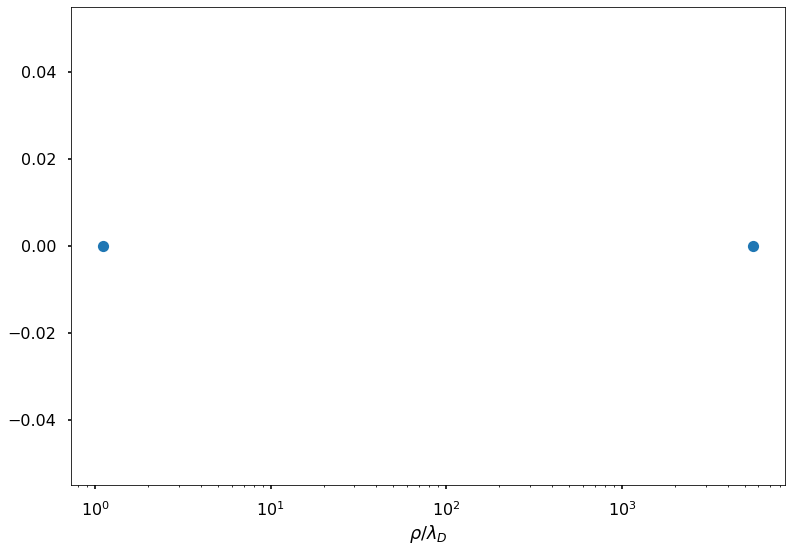

Done at 2022-05-10 10:47:54


In [2]:
def discretize_rho():
    #obtain fine grid next to the solid-liquid interface
    #use 16 points between 0.02*debye_len and 10*debye_len
    #reduce debye_length if water film is too thin by
    debye_length = min(9e-9,height_water)
    print('DEBYE LENGTH IS: %.2e nm'%(debye_length*1e9))
    
    rho = np.logspace(np.log10(0.02),1,16)*debye_length
    dr = np.diff(np.log10(rho/debye_length))[0]
    print('min(np.diff(rho) %.2e nm'%(min(np.diff(rho))*1e9))
    print('height_water %.2e nm'%height_water)
    print('')
    
    #use the logarithmic interval above to discretize the entire space
    #which extends to radius_solid for this slab example
    rho = np.power(10,np.arange(np.log10(0.02)-dr,1,dr))*debye_length
    cnt = 0
    while rho[-1]<radius_solid:
        cnt = cnt+1
        rho = np.power(10,np.arange(np.log10(0.02)-dr,1+dr*cnt,dr))*debye_length
    
    #adjust the starting and ending points in the discretization
    rho = np.r_[0,rho[:-2],radius_water]
    #no need to refine diffuse layer because there is no diffuse layer
    rho = np.r_[0,radius_water]
    
    #insert air-water interface into the discretization
    mask = rho<height_water
    rho = np.r_[rho[mask],height_water,rho[~mask]]
    #ind = np.argmin((rho-height_water)**2)
    #rho[ind] = height_water
    
    #print out discretization
    print('See radial discretization below')
    print(rho)
    
    #display and check the discretization
    fig,ax = plt.subplots()
    mask = rho>0
    ax.plot(rho[mask]/debye_length,np.zeros_like(rho[mask]),'o')
    ax.set_xscale('log')
    ax.set_xlabel(r'$\rho$/$\lambda_D$')
    #ax.set_xlim(0.01,20)
    plt.show()
    return rho

if __name__=='__main__':
    rho = discretize_rho()
    now = datetime.datetime.now()
    print('Done at',now.strftime("%Y-%m-%d %H:%M:%S"))


## Mesh generation

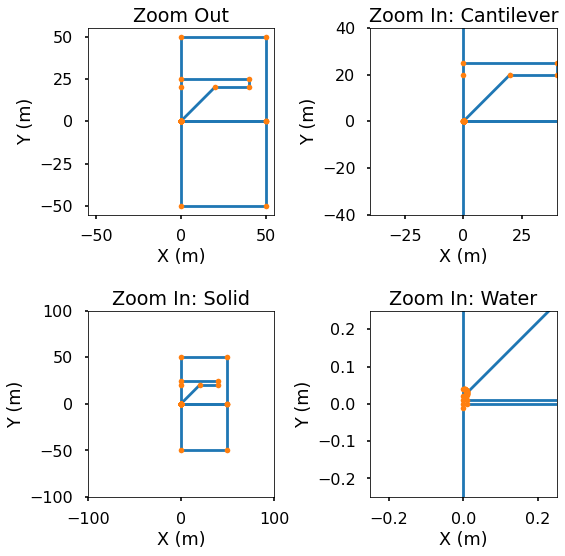

Opening mesh_ex06.poly.
Constructing Delaunay triangulation by divide-and-conquer method.
Delaunay milliseconds:  0
Recovering segments in Delaunay triangulation.
Segment milliseconds:  0
Removing unwanted triangles.
Spreading regional attributes and area constraints.
Hole milliseconds:  0
Adding Steiner points to enforce quality.
Quality milliseconds:  73

Writing mesh_ex06.1.node.
Writing mesh_ex06.1.ele.
Writing mesh_ex06.1.poly.
Writing mesh_ex06.1.edge.
Writing mesh_ex06.1.neigh.

Output milliseconds:  216
Total running milliseconds:  290

Statistics:

  Input vertices: 50
  Input segments: 36
  Input holes: 1

  Mesh vertices: 27395
  Mesh triangles: 54664
  Mesh edges: 82058
  Mesh exterior boundary edges: 124
  Mesh interior boundary edges: 8195
  Mesh subsegments (constrained edges): 8319

Done at 2022-05-10 11:21:38


In [4]:
def generate_mesh():
    #This script only works for the same height and radius between air and solid
    #X is the axis of symmetry
    #Y is the longitudinal axis
    cpts = np.zeros((0,3)) #coord_x/coord_y/flag of control points
    segs = np.zeros((0,3)) #ind_a/ind_b/flag of line segmenets
    holes = np.zeros((0,2)) #coord_x/coord_y
    zones = np.zeros((0,3)) #coord_x/coord_y/area
        
    #**************************************************************************
    #--------------------------------------------------------------------------
    #==========================================================================
    #define the lowermost, rightmost, and topmost boundary points
    radius_b = max(radius_air,radius_solid)
    height_b = max(height_air,height_solid)
    x = np.r_[0,radius_b,radius_b,0]
    y = np.r_[-height_b,-height_b,height_b,height_b]
    cpts = np.r_[cpts,np.c_[x,y,np.ones(len(x))*1]] #node flag of 1
        
    #define the leftmost boundary points (on the axis of symmetry)
    #skip points at two ends
    mask = (rho>0)&(rho<offset_tip)
    y = np.r_[-np.flipud(rho[:-1]),rho[mask],offset_tip,
              offset_tip+2*radius_tip,
              offset_tip+2*radius_tip+height_cone,
              offset_tip+2*radius_tip+height_cone+height_arm]
    x = np.zeros_like(y)
    cpts = np.r_[cpts,np.c_[x,y,np.ones(len(x))*1]] #node flag of 1
    
    #--------------------------------------------------------------------------
    #define the top edge points of the solid (top right corner point included)
    #skip edge points on the axis of symmetry
    x = np.r_[rho[1:-1],radius_solid]
    y = np.r_[0*rho[1:-1],0]
    cpts = np.r_[cpts,np.c_[x,y,np.ones(len(x))*0]] #node flag of 0
    
    #--------------------------------------------------------------------------
    #define the top edge points of the water
    #skip edge points on the axis of symmetry
    x = np.r_[rho[1:-1],radius_water]
    y = np.ones_like(x)*height_water
    cpts = np.r_[cpts,np.c_[x,y,np.ones(len(x))*0]] #node flag of 0
    
    #define the bottom edge points of the water
    #skip the bottom edge points on the axis of symmetry
    x = np.r_[radius_water]
    y = np.r_[0]
    cpts = np.r_[cpts,np.c_[x,y,np.ones(len(x))*0]] #node flag of 0
    
    #--------------------------------------------------------------------------
    #define the edge points on the tip surface
    #skip edge points on the axis of symmetry
    nA = 32
    ns = nA+1-2
    dA = np.pi/nA
    phi = np.arange(1,ns+1)*dA-np.pi/2 #half the circle
    x = radius_tip*np.cos(phi)+0.0
    y = radius_tip*np.sin(phi)+offset_tip+radius_tip
    cpts = np.r_[cpts,np.c_[x,y,np.ones(len(x))*0]] #node flag of 0
    
    #--------------------------------------------------------------------------
    #define the edge points on the cone surface
    x = np.r_[radius_cone]
    y = np.r_[height_cone]+offset_tip+2*radius_tip
    cpts = np.r_[cpts,np.c_[x,y,np.ones(len(x))*0]] #node flag of 0
    
    #--------------------------------------------------------------------------
    #define inner control points along the cantilever
    x = np.r_[radius_arm,radius_arm]
    y = np.r_[0,height_arm]+offset_tip+2*radius_tip+height_cone
    cpts = np.r_[cpts,np.c_[x,y,np.ones(len(x))*0]] #node flag of 0
    
    #**************************************************************************
    #--------------------------------------------------------------------------
    #==========================================================================
    #define the segments on the lowermost boundary
    x = np.r_[0,radius_b]
    y = np.r_[-radius_b,-radius_b]
    for i in range(len(x)-1):
        ind_a = np.argmin((cpts[:,0]-x[i])**2+(cpts[:,1]-y[i])**2)
        ind_b = np.argmin((cpts[:,0]-x[i+1])**2+(cpts[:,1]-y[i+1])**2)
        segs = np.r_[segs,np.c_[ind_a,ind_b,EDGE_FLAG_BOTTOM_BOUND]] #predefined edge flag
    #print('Lowermost boundary: edge flag 1')
    
    #define the segments on the rightmost boundary
    x = np.r_[radius_b,radius_b]
    y = np.r_[-radius_b,radius_b]
    for i in range(len(x)-1):
        ind_a = np.argmin((cpts[:,0]-x[i])**2+(cpts[:,1]-y[i])**2)
        ind_b = np.argmin((cpts[:,0]-x[i+1])**2+(cpts[:,1]-y[i+1])**2)
        segs = np.r_[segs,np.c_[ind_a,ind_b,EDGE_FLAG_RIGHT_BOUND]] #predefined edge flag
    #print('Rightmost boundary: edge flag 2')
    
    #define the segments on the topmost boundary
    x = np.r_[0,radius_b]
    y = np.r_[radius_b,radius_b]
    for i in range(len(x)-1):
        ind_a = np.argmin((cpts[:,0]-x[i])**2+(cpts[:,1]-y[i])**2)
        ind_b = np.argmin((cpts[:,0]-x[i+1])**2+(cpts[:,1]-y[i+1])**2)
        segs = np.r_[segs,np.c_[ind_a,ind_b,EDGE_FLAG_TOP_BOUND]] #predefined edge flag
    #print('Uppermost boundary: edge flag 3')
    
    #define the segments on the leftmost boundary (axis of symmetry)
    mask = (rho>0)&(rho<offset_tip)
    y = np.r_[-radius_b,-np.flipud(rho),rho[mask],offset_tip,
              offset_tip+2*radius_tip,offset_tip+2*radius_tip+height_cone,
              offset_tip+2*radius_tip+height_cone+height_arm,radius_b]
    x = np.zeros_like(y)
    for i in range(len(x)-1):
        ind_a = np.argmin((cpts[:,0]-x[i])**2+(cpts[:,1]-y[i])**2)
        ind_b = np.argmin((cpts[:,0]-x[i+1])**2+(cpts[:,1]-y[i+1])**2)
        segs = np.r_[segs,np.c_[ind_a,ind_b,EDGE_FLAG_AXIS_SYMMETRY]] #predefined edge flag
    #print('Axis of symmetry: edge flag 4')
    
    #--------------------------------------------------------------------------
    #define the segments on the top edge of the solid (solid-liquid interface)
    x = np.r_[rho[:-1],radius_solid]
    y = np.zeros_like(x)
    for i in range(len(x)-1):
        ind_a = np.argmin((cpts[:,0]-x[i])**2+(cpts[:,1]-y[i])**2)
        ind_b = np.argmin((cpts[:,0]-x[i+1])**2+(cpts[:,1]-y[i+1])**2)
        segs = np.r_[segs,np.c_[ind_a,ind_b,EDGE_FLAG_SW_INTERFACE]] #predefined edge flag
    #print('Solid-liquid interface: edge flag 7')
    
    #--------------------------------------------------------------------------
    #define the segments on the right edge of the water
    x = np.r_[radius_water,radius_water]
    y = np.r_[0,height_water]
    for i in range(len(x)-1):
        ind_a = np.argmin((cpts[:,0]-x[i])**2+(cpts[:,1]-y[i])**2)
        ind_b = np.argmin((cpts[:,0]-x[i+1])**2+(cpts[:,1]-y[i+1])**2)
        segs = np.r_[segs,np.c_[ind_a,ind_b,EDGE_FLAG_AW_INTERFACE]] #predefined edge flag
    #print('Right of water: edge flag 8')
    
    #define the segments on the top edge of the water
    x = np.r_[0,radius_water]
    y = np.r_[height_water,height_water]
    for i in range(len(x)-1):
        ind_a = np.argmin((cpts[:,0]-x[i])**2+(cpts[:,1]-y[i])**2)
        ind_b = np.argmin((cpts[:,0]-x[i+1])**2+(cpts[:,1]-y[i+1])**2)
        segs = np.r_[segs,np.c_[ind_a,ind_b,EDGE_FLAG_AW_INTERFACE]] #predefined edge flag
    #print('Air-water interface: edge flag 9')
    
    #--------------------------------------------------------------------------
    #define the segments along the bottom tip surface
    nA = 32
    ns = nA+1-2
    dA = np.pi/nA
    phi = np.arange(0,nA//2+1)*dA-np.pi/2 #half the circle
    #print(phi*180/np.pi)
    x = radius_tip*np.cos(phi)+0.0
    y = radius_tip*np.sin(phi)+offset_tip+radius_tip
    for i in range(len(x)-1):
        ind_a = np.argmin((cpts[:,0]-x[i])**2+(cpts[:,1]-y[i])**2)
        ind_b = np.argmin((cpts[:,0]-x[i+1])**2+(cpts[:,1]-y[i+1])**2)
        segs = np.r_[segs,np.c_[ind_a,ind_b,EDGE_FLAG_EQUIPOTENTIAL_SURF]] #predefined edge flag
    #print('Lower tip surface: edge flag 10')

#     #define the segments along the top tip surface
#     nA = 32
#     ns = nA+1-2
#     dA = np.pi/nA
#     phi = np.arange(nA//2,nA+1)*dA-np.pi/2 #half the circle
#     #print(phi*180/np.pi)
#     x = radius_tip*np.cos(phi)+0.0
#     y = radius_tip*np.sin(phi)+offset_tip+radius_tip
#     for i in range(len(x)-1):
#         ind_a = np.argmin((cpts[:,0]-x[i])**2+(cpts[:,1]-y[i])**2)
#         ind_b = np.argmin((cpts[:,0]-x[i+1])**2+(cpts[:,1]-y[i+1])**2)
#         segs = np.r_[segs,np.c_[ind_a,ind_b,EDGE_FLAG_EQUIPOTENTIAL_SURF]] #predefined edge flag
#     #print('Upper tip surface: edge flag 11')
    
    #--------------------------------------------------------------------------
    #define the right segments along the cone surface
    x = np.r_[radius_tip,radius_cone]
    y = np.r_[0,height_cone+radius_tip]+offset_tip+radius_tip
    for i in range(len(x)-1):
        ind_a = np.argmin((cpts[:,0]-x[i])**2+(cpts[:,1]-y[i])**2)
        ind_b = np.argmin((cpts[:,0]-x[i+1])**2+(cpts[:,1]-y[i+1])**2)
        segs = np.r_[segs,np.c_[ind_a,ind_b,EDGE_FLAG_EQUIPOTENTIAL_SURF]] #predefined edge flag
    #print('Right cone surface: edge flag 100')
    
#     #define the top segments along the cone surface
#     x = np.r_[0,radius_cone]
#     y = np.r_[height_cone,height_cone]+offset_tip+2*radius_tip
#     for i in range(len(x)-1):
#         ind_a = np.argmin((cpts[:,0]-x[i])**2+(cpts[:,1]-y[i])**2)
#         ind_b = np.argmin((cpts[:,0]-x[i+1])**2+(cpts[:,1]-y[i+1])**2)
#         segs = np.r_[segs,np.c_[ind_a,ind_b,100]] #edge flag of 100
#     #print('Top cone surface: edge flag 100')
    
    #--------------------------------------------------------------------------
    #define the segments along the remaining cantilever surface
    x = np.r_[0,radius_arm,radius_arm,radius_cone]
    y = np.r_[height_arm,height_arm,0,0]+offset_tip+2*radius_tip+height_cone
    for i in range(len(x)-1):
        ind_a = np.argmin((cpts[:,0]-x[i])**2+(cpts[:,1]-y[i])**2)
        ind_b = np.argmin((cpts[:,0]-x[i+1])**2+(cpts[:,1]-y[i+1])**2)
        segs = np.r_[segs,np.c_[ind_a,ind_b,EDGE_FLAG_EQUIPOTENTIAL_SURF]] #predefined edge flag
    #print('Arm surface: edge flag 100')
    print('')
    
    #**************************************************************************
    #--------------------------------------------------------------------------
    #==========================================================================
    #define markers for holes and zones
#     x = np.r_[0,0,0,0,0,0]+radius_tip/2 #solid,water,tip,cone,arm,air
#     y = np.r_[-height_solid/2,height_water/2,offset_tip+radius_tip,
#               offset_tip+2*radius_tip+height_cone/2,
#               offset_tip+2*radius_tip+height_cone+height_arm/2,
#               height_air/4]
#     area = np.r_[1,1,1,100,100,900]
#     zones = np.r_[zones,np.c_[x,y,area]]
    x = np.r_[0]+radius_tip/2 #cantilever tip
    y = np.r_[offset_tip+radius_tip]
    holes = np.r_[holes,np.c_[x,y]]

    x = np.r_[0,0,0]+radius_tip/2 #solid,water,air
    y = np.r_[-height_solid/2,height_water/2,offset_tip+2*radius_tip+height_cone+height_arm*2]
    area = np.r_[900,1,900]
    zones = np.r_[zones,np.c_[x,y,area]]

    
    #build the poly file
    f1 = open(mesh_prefix+'.poly','w')
    f1.write(str(len(cpts))+'  2 0 1  #verticies #dimensions  #attributes #boundary markers \n')
    
    #write the vertices
    cnt = 1    
    for i in range(len(cpts)):
        f1.write("{0:6.0F} {1:20.5F} {2:20.5F} {3:6.0F}\n".format(cnt,cpts[i,0]*1e6,cpts[i,1]*1e6,cpts[i,2]))
        cnt = cnt+1
    f1.write('\n')

    #write the segments
    cnt = 1
    f1.write(str(len(segs))+' 1 #segments, boundary marker\n')
    for i in range(len(segs)):
        f1.write("{0:6.0F} {1:5.0F} {2:5.0F} {3:6.0F}\n".format(cnt,segs[i,0]+1,segs[i,1]+1,segs[i,2]))
        cnt = cnt+1
    f1.write('\n')
        
    #write holes
    f1.write('%d\n'%(len(holes)))
    for i in range(len(holes)):
        x = holes[i,0]
        y = holes[i,1]
        f1.write('{0:6.0F} {1:12.6F} {2:12.6F} 1\n'.format(i+1,x*1e6,y*1e6))
    f1.write('\n')

    #write area constraints for zones
    f1.write('%d\n'%(len(zones)))
    for i in range(len(zones)):
        x = zones[i,0]
        y = zones[i,1]
        area = zones[i,2]
        f1.write('{0:6.0F} {1:12.6F} {2:12.6F} {3:6.0F} {4:12.6F}\n'.format(i+1,x*1e6,y*1e6,i+1,area))
    
    f1.write('\n')
    f1.write('# triangle -pnq30Aae '+mesh_prefix+'.poly \n')
    f1.close()
        
    #**************************************************************************
    #==========================================================================
    #--------------------------------------------------------------------------
    disp_factor = 1e6
    fig,ax = plt.subplots(2,2,figsize=(8,8))
    axs = ax.flatten()
    x = cpts[segs[:,:-1].astype(int),0]
    y = cpts[segs[:,:-1].astype(int),1]
    axs[0].plot(x.T*disp_factor,y.T*disp_factor,'-',color='tab:blue')
    axs[0].plot(cpts[:,0]*disp_factor,cpts[:,1]*disp_factor,'.',color='tab:orange')
    axs[0].set_xlabel('X (m)')
    axs[0].set_ylabel('Y (m)')
    axs[0].set_aspect('equal')
    axs[0].set_xlim(-radius_air*1.1*disp_factor,radius_air*1.1*disp_factor)
    axs[0].set_ylim(-radius_air*1.1*disp_factor,radius_air*1.1*disp_factor)
    axs[0].set_title('Zoom Out')
    
    axs[1].plot(x.T*disp_factor,y.T*disp_factor,'-',color='tab:blue')
    axs[1].plot(cpts[:,0]*disp_factor,cpts[:,1]*disp_factor,'.',color='tab:orange')
    axs[1].set_xlabel('X (m)')
    axs[1].set_ylabel('Y (m)')
    axs[1].set_aspect('equal')
    axs[1].set_xlim(-height_cone*2*disp_factor,height_cone*2*disp_factor)
    axs[1].set_ylim(-height_cone*2*disp_factor,height_cone*2*disp_factor)
    axs[1].set_title('Zoom In: Cantilever')
    
    axs[2].plot(x.T*disp_factor,y.T*disp_factor,'-',color='tab:blue')
    axs[2].plot(cpts[:,0]*disp_factor,cpts[:,1]*disp_factor,'.',color='tab:orange')
    axs[2].set_xlabel('X (m)')
    axs[2].set_ylabel('Y (m)')
    axs[2].set_aspect('equal')
    axs[2].set_xlim(-height_solid*2*disp_factor,height_solid*2*disp_factor)
    axs[2].set_ylim(-height_solid*2*disp_factor,height_solid*2*disp_factor)
    axs[2].set_title('Zoom In: Solid')
    
    axs[3].plot(x.T*disp_factor,y.T*disp_factor,'-',color='tab:blue')
    axs[3].plot(cpts[:,0]*disp_factor,cpts[:,1]*disp_factor,'.',color='tab:orange')
    axs[3].set_xlabel('X (m)')
    axs[3].set_ylabel('Y (m)')
    axs[3].set_aspect('equal')
    axs[3].set_xlim(-height_water*25*disp_factor,height_water*25*disp_factor)
    axs[3].set_ylim(-height_water*25*disp_factor,height_water*25*disp_factor)
    axs[3].set_title('Zoom In: Water')
    
    plt.tight_layout()
    plt.show()
    return cpts,segs

if __name__ == '__main__':
    cpts,segs = generate_mesh()
    process = subprocess.Popen([triangle+' -pnq30Aae '+mesh_prefix+'.poly'],shell=True)
    process.wait()
    now = datetime.datetime.now()
    print('Done at',now.strftime("%Y-%m-%d %H:%M:%S"))
